# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file
df = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data
import os

# Select the folder having data files
data_dir = '/content/drive/MyDrive/Datasets and Dictionary/trip_records'
os.chdir(data_dir)

# Create a list of all the twelve files to read
file_list = [file for file in os.listdir() if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
          daily_data = monthly_data[monthly_data['date'] == date]
          # Iterate through each hour of the selected date
          for hour in daily_data['hour'].unique():
            hourly_data = daily_data[daily_data['hour'] == hour]
            # Sample 5% of the hourly data randomly
            sample = hourly_data.sample(frac=0.05, random_state=42)
            # Append the sampled data to the current date's dataframe
            # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sample])

        # Append the sampled data of this date to the final dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911116 entries, 2386 to 3224579
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

In [12]:
# reduce the total entires to 300000
df= df.sample(n=300000, random_state=42)

In [13]:
# final data with 300000 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 857878 to 2690915
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289697 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289697 non-null  float64       
 6   store_and_fwd_flag     289697 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [14]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/trip_records.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file
trip_df = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/trip_records.parquet')
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 857878 to 2690915
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289697 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289697 non-null  float64       
 6   store_and_fwd_flag     289697 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [247]:
# df.head()
trip_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1747654         2  2023-06-16 17:42:26   2023-06-16 17:56:07              2.0   
12678           2  2023-03-01 08:02:48   2023-03-01 08:07:24              1.0   
724452          2  2023-10-07 19:56:37   2023-10-07 20:00:46              1.0   
3039987         2  2023-12-29 22:37:17   2023-12-29 23:00:05              1.0   
1480128         1  2023-08-17 13:45:56   2023-08-17 13:52:31              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1747654           1.85         1.0                  N           238   
12678             0.81         1.0                  N           263   
724452            1.23         1.0                  N           141   
3039987           2.83         1.0                  N           230   
1480128           0.10         1.0                  N           233   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1747654           142             1  ...      0.5        4.14           0.0   
12678             263             1  ...      0.5        2.10           0.0   
724452            229             1  ...      0.5        1.68           0.0   
3039987           113             1  ...      0.5        5.24           0.0   
1480128           233             1  ...      0.5        2.20           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1747654                    1.0         24.84                   2.5   
12678                      1.0         12.60                   2.5   
724452                     1.0         12.88                   2.5   
3039987                    1.0         31.44                   2.5   
1480128                    1.0         13.40                   2.5   

         Airport_fee        date  hour airport_fee  
1747654          0.0  2023-06-16    17         NaN  
12678            0.0  2023-03-01     8         NaN  
724452           0.0  2023-10-07    19         NaN  
3039987          0.0  2023-12-29    22         NaN  
1480128          0.0  2023-08-17    13         NaN  

[5 rows x 22 columns]

In [248]:
# df.info()
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1747654 to 2667715
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289883 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289883 non-null  float64       
 6   store_and_fwd_flag     289883 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [249]:
# Fix the index and drop any columns that are not needed
trip_df.drop(columns=['date'],inplace= True)
trip_df.drop(columns=['hour'], inplace= True)

In [250]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1747654 to 2667715
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289883 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289883 non-null  float64       
 6   store_and_fwd_flag     289883 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [251]:
# Combine the two airport fee columns
dup_cols = ['Airport_fee', 'airport_fee']
if all(col in trip_df.columns for col in dup_cols):
  trip_df['Airport_fee'] = trip_df[dup_cols].sum(axis=1, skipna=True)
  trip_df.drop(columns=['airport_fee'], inplace=True)

print(trip_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [252]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1747654 to 2667715
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289883 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289883 non-null  float64       
 6   store_and_fwd_flag     289883 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

In [253]:
# check where values of fare amount are negative
negative_fare_amount = trip_df[trip_df['fare_amount'] < 0]
print(negative_fare_amount)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [254]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_amount['RatecodeID'].unique()

array([], dtype=float64)

In [255]:
# Find which columns have negative values
numeric_cols = trip_df.select_dtypes(include=['number'])
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()].tolist()
print("Columns containing negative values:", negative_columns)

Columns containing negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [256]:
negative_counts = (trip_df[negative_columns] < 0).sum()
print(negative_counts)

mta_tax                  12
improvement_surcharge    12
total_amount             12
congestion_surcharge      6
Airport_fee               2
dtype: int64


In [257]:
# fix these negative values
trip_df[negative_columns] = trip_df[negative_columns].applymap(lambda x: 0 if x < 0 else x)
print((trip_df[negative_columns] < 0).sum())

mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [27]:
# Find the proportion of missing values in each column
trip_df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.435636
trip_distance             0.000000
RatecodeID                3.435636
store_and_fwd_flag        3.435636
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.435636
Airport_fee              11.331934
date                      0.000000
hour                      0.000000
airport_fee              92.103702
pickup_zone               1.016695
pickup_borough            1.016695
dropoff_zone              1.459895
dropoff_borough           1.459895
trip_duration_hours       0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [28]:
# Display the rows with null values
trip_df_nulls = trip_df[trip_df.isnull().any(axis=1)]
print(trip_df_nulls)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-12-08 11:25:22   2023-12-08 11:53:20              2.0   
1              2  2023-08-01 19:43:23   2023-08-01 19:50:05              1.0   
2              2  2023-06-16 19:47:43   2023-06-16 20:18:27              1.0   
3              1  2023-05-07 00:03:10   2023-05-07 00:15:38              2.0   
4              2  2023-07-08 22:55:49   2023-07-08 23:21:50              1.0   
...          ...                  ...                   ...              ...   
300085         2  2023-12-11 05:58:11   2023-12-11 06:03:23              1.0   
300086         1  2023-02-26 14:15:02   2023-02-26 14:43:12              1.0   
300087         2  2023-07-07 10:18:58   2023-07-07 10:24:24              2.0   
300088         2  2023-08-30 08:23:30   2023-08-30 08:43:36              1.0   
300089         2  2023-11-26 02:02:36   2023-11-26 02:25:23              2.0   

        trip_distance  RatecodeID store

In [29]:
# Impute NaN values in 'passenger_count'
trip_df['passenger_count'].fillna(trip_df['passenger_count'].mode()[0], inplace=True)

In [30]:
trip_df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                3.435636
store_and_fwd_flag        3.435636
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.435636
Airport_fee              11.331934
date                      0.000000
hour                      0.000000
airport_fee              92.103702
pickup_zone               1.016695
pickup_borough            1.016695
dropoff_zone              1.459895
dropoff_borough           1.459895
trip_duration_hours       0.000000
dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [31]:
# Fix missing values in 'RatecodeID'
trip_df['RatecodeID'].fillna(trip_df['RatecodeID'].mode()[0], inplace=True)

In [32]:
trip_df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
store_and_fwd_flag        3.435636
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.435636
Airport_fee              11.331934
date                      0.000000
hour                      0.000000
airport_fee              92.103702
pickup_zone               1.016695
pickup_borough            1.016695
dropoff_zone              1.459895
dropoff_borough           1.459895
trip_duration_hours       0.000000
dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [33]:
# handle null values in congestion_surcharge
trip_df['congestion_surcharge'].fillna(trip_df['congestion_surcharge'].mode()[0], inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [34]:
trip_df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
store_and_fwd_flag        3.435636
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
Airport_fee              11.331934
date                      0.000000
hour                      0.000000
airport_fee              92.103702
pickup_zone               1.016695
pickup_borough            1.016695
dropoff_zone              1.459895
dropoff_borough           1.459895
trip_duration_hours       0.000000
dtype: float64

In [35]:
# Handle any remaining missing values
trip_df['store_and_fwd_flag'].fillna(trip_df['store_and_fwd_flag'].mode()[0], inplace=True)

In [36]:
trip_df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
store_and_fwd_flag        0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
Airport_fee              11.331934
date                      0.000000
hour                      0.000000
airport_fee              92.103702
pickup_zone               1.016695
pickup_borough            1.016695
dropoff_zone              1.459895
dropoff_borough           1.459895
trip_duration_hours       0.000000
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [268]:
# Describe the data and check if there are any potential outliers present
trip_df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.733670  2023-07-02 15:47:07.025073  2023-07-02 16:04:29.937610   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:09:35   
25%         1.000000  2023-04-02 10:14:57.750000         2023-04-02 10:28:39   
50%         2.000000         2023-06-27 11:22:00         2023-06-27 11:41:29   
75%         2.000000         2023-10-06 19:20:00         2023-10-06 19:35:47   
max         6.000000         2023-12-31 23:53:18         2024-01-01 12:29:40   
std         0.446541                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.358357       3.571007       1.608983     165.249893   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.390000       1.000000     234.000000   
max           9.000000   26217.980000      99.000000     265.000000   
std           0.883976      51.846967       7.244139      64.055556   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.364717       1.165143      20.261379       1.585049   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.799210       0.508906     261.984417       1.825300   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.495388       3.527405       0.590637               0.999091   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.800000       0.000000               1.000000   
75%         0.500000       4.400000       0.000000               1.000000   
max         4.000000     180.000000      83.000000               1.000000   
std         0.048348       4.017049       2.171328               0.027577   

        total_amount  congestion_surcharge    Airport_fee  
count  300000.000000         300000.000000  300000.000000  
mean       29.298912              2.315592       0.137629  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.720000              2.500000       0.000000  
max    143167.450000              2.500000       1.750000  
std       262.328281              0.653464       0.456887

In [269]:
#Check for Potential Outliners using IQR
num_cols = trip_df.select_dtypes(include=['number'])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))).sum()
print("Number of potential outliers in each column:\n", outliers)

Number of potential outliers in each column:
 VendorID                    60
passenger_count          71952
trip_distance            39308
RatecodeID               16024
PULocationID                 0
DOLocationID                 0
payment_type             63937
fare_amount              30926
extra                     5346
mta_tax                   2788
tip_amount               22865
tolls_amount             24124
improvement_surcharge      336
total_amount             34635
congestion_surcharge     22129
Airport_fee              25399
dtype: int64


In [270]:
# Check for potential out of place values in various columns
initial_count = trip_df.shape[0]
print("Initial number of rows:", initial_count)

Initial number of rows: 300000


In [271]:
#Checking Passenger Data
print("Unique values in passenger_count:", trip_df['passenger_count'].unique())
invalid_passenger_count = trip_df[(trip_df['passenger_count'] <= 0) | (trip_df['passenger_count'] > 6)]
print("Out-of-place passenger counts:\n", invalid_passenger_count[['passenger_count']].value_counts())

Unique values in passenger_count: [2. 1. 0. 3. 4. 5. 6. 8. 7. 9.]
Out-of-place passenger counts:
 passenger_count
0.0                4692
7.0                   1
8.0                   1
9.0                   1
Name: count, dtype: int64


In [272]:
#Check trip Distance and it should not be negative
print("Trip Distance Summary:\n", trip_df['trip_distance'].describe())
invalid_trip_distance = trip_df[(trip_df['trip_distance'] <= 0) | (trip_df['trip_distance'] > 100)]
print("Trips with out-of-place distances:\n", invalid_trip_distance[['trip_distance']])

Trip Distance Summary:
 count    300000.000000
mean          3.571007
std          51.846967
min           0.000000
25%           1.050000
50%           1.790000
75%           3.390000
max       26217.980000
Name: trip_distance, dtype: float64
Trips with out-of-place distances:
          trip_distance
2218228            0.0
1757120            0.0
2791022            0.0
1798219            0.0
1134546            0.0
...                ...
1620234            0.0
3415405            0.0
3384112            0.0
2805357            0.0
380128             0.0

[5966 rows x 1 columns]


In [273]:
#Check Fare Amount it shouldn't be negative and also not too high
print("Fare Amount Summary:\n", trip_df['fare_amount'].describe())
invalid_fare = trip_df[(trip_df['fare_amount'] < 0) | (trip_df['fare_amount'] > 500)]
print("Out-of-place fare amounts:\n", invalid_fare[['fare_amount']])

Fare Amount Summary:
 count    300000.000000
mean         20.261379
std         261.984417
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max      143163.450000
Name: fare_amount, dtype: float64
Out-of-place fare amounts:
          fare_amount
3350277       637.90
750805        999.00
424272        728.90
1624967       584.70
508368        600.00
330801     143163.45
157980        521.70


In [274]:
#RateCodeID Should have only valid Codes
print("Unique RatecodeID values:", trip_df['RatecodeID'].unique())
invalid_ratecodes = trip_df[~trip_df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]
print("Invalid RatecodeIDs:\n", invalid_ratecodes[['RatecodeID']])

Unique RatecodeID values: [ 1.  2.  5.  4. 99.  3.]
Invalid RatecodeIDs:
          RatecodeID
2786928        99.0
1156156        99.0
1666186        99.0
1539972        99.0
907191         99.0
...             ...
646293         99.0
941058         99.0
1814702        99.0
905361         99.0
1388318        99.0

[1646 rows x 1 columns]


In [275]:
#Check Payment Type
print("Unique Payment Types:", trip_df['payment_type'].unique())
invalid_payment = trip_df[~trip_df['payment_type'].isin([1, 2, 3, 4, 5, 6])]
print("Invalid payment types:\n", invalid_payment[['payment_type']])

Unique Payment Types: [1 2 4 0 3]
Invalid payment types:
          payment_type
3279957             0
2791022             0
3220626             0
3329709             0
3422012             0
...               ...
2805357             0
3508713             0
3450483             0
3317337             0
3202492             0

[10117 rows x 1 columns]


In [276]:
#Checking if any invalid pickup and drop times are present
invalid_time = trip_df[trip_df['tpep_pickup_datetime'] > trip_df['tpep_dropoff_datetime']]
print("Trips where pickup is after dropoff:\n", invalid_time[['tpep_pickup_datetime', 'tpep_dropoff_datetime']])

Trips where pickup is after dropoff:
         tpep_pickup_datetime tpep_dropoff_datetime
492029   2023-11-05 01:54:41   2023-11-05 01:00:23
488640   2023-11-05 01:57:57   2023-11-05 01:05:21
491013   2023-11-05 01:41:28   2023-11-05 01:08:04
490936   2023-11-05 01:42:12   2023-11-05 01:04:24
2824128  2023-09-27 16:09:51   2023-09-27 16:09:32
494124   2023-11-05 01:58:09   2023-11-05 01:08:11
488490   2023-11-05 01:24:41   2023-11-05 01:00:00
3208841  2023-06-01 13:06:38   2023-06-01 13:06:34
491566   2023-11-05 01:57:58   2023-11-05 01:05:33
3227952  2023-11-05 01:48:53   2023-11-05 01:06:00
2672834  2023-08-31 11:40:00   2023-08-31 11:24:26
3278874  2023-06-22 15:06:51   2023-06-22 15:06:38
2910990  2023-02-27 22:02:58   2023-02-27 22:02:12
3302295  2023-06-29 16:06:33   2023-06-29 16:06:12
2862047  2023-02-09 12:02:34   2023-02-09 12:02:24
3337546  2023-03-08 20:03:19   2023-03-08 20:03:08
3348360  2023-03-12 10:03:11   2023-03-12 10:03:08
493748   2023-11-05 01:41:16   2023-11-05 01

In [277]:
#Checking of there are any inconsistencies on Total Amount
trip_df['calculated_total'] = (
    trip_df['fare_amount'] + trip_df['extra'] + trip_df['mta_tax'] +
    trip_df['tip_amount'] + trip_df['tolls_amount'] +
    trip_df['improvement_surcharge'] + trip_df['congestion_surcharge']
)
mismatched_totals = trip_df[abs(trip_df['total_amount'] - trip_df['calculated_total']) > 1]
print("Mismatched total amounts:\n", mismatched_totals[['total_amount', 'calculated_total']])

Mismatched total amounts:
          total_amount  calculated_total
1480128         13.40             15.90
1811962         50.60             53.10
2770781         11.20             13.70
540500          66.00             64.75
2218228          9.50             12.00
...               ...               ...
1185973         24.95             27.45
1419472         25.96             28.46
1686236         20.20             22.70
157269          14.75             17.25
264464          31.90             34.40

[90966 rows x 2 columns]


In [278]:
trip_df.shape[0]

300000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [279]:
# remove passenger_count > 6
trip_df = trip_df[trip_df['passenger_count'] <= 6]

In [280]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299997 entries, 1747654 to 2667715
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299997 non-null  int64         
 1   tpep_pickup_datetime   299997 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299997 non-null  datetime64[us]
 3   passenger_count        299997 non-null  float64       
 4   trip_distance          299997 non-null  float64       
 5   RatecodeID             299997 non-null  float64       
 6   store_and_fwd_flag     299997 non-null  object        
 7   PULocationID           299997 non-null  int64         
 8   DOLocationID           299997 non-null  int64         
 9   payment_type           299997 non-null  int64         
 10  fare_amount            299997 non-null  float64       
 11  extra                  299997 non-null  float64       
 12  mta_tax                299997 non-null  fl

In [281]:
# Continue with outlier handling

In [282]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
trip_df = trip_df[~((trip_df['trip_distance'] < 0.1) & (trip_df['fare_amount'] > 300))]

In [283]:
trip_df.info()
trip_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 299990 entries, 1747654 to 2667715
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299990 non-null  int64         
 1   tpep_pickup_datetime   299990 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299990 non-null  datetime64[us]
 3   passenger_count        299990 non-null  float64       
 4   trip_distance          299990 non-null  float64       
 5   RatecodeID             299990 non-null  float64       
 6   store_and_fwd_flag     299990 non-null  object        
 7   PULocationID           299990 non-null  int64         
 8   DOLocationID           299990 non-null  int64         
 9   payment_type           299990 non-null  int64         
 10  fare_amount            299990 non-null  float64       
 11  extra                  299990 non-null  float64       
 12  mta_tax                299990 non-null  fl

299990

In [284]:
#Fixing Columns where Trip distance and Fare Amounts are zero that means pickup & Drop points should be same
trip_df = trip_df[~((trip_df['trip_distance'] == 0) & (trip_df['fare_amount'] == 0) &
                     (trip_df['PULocationID'] != trip_df['DOLocationID']))]

In [285]:
trip_df.info()
trip_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 299981 entries, 1747654 to 2667715
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299981 non-null  int64         
 1   tpep_pickup_datetime   299981 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299981 non-null  datetime64[us]
 3   passenger_count        299981 non-null  float64       
 4   trip_distance          299981 non-null  float64       
 5   RatecodeID             299981 non-null  float64       
 6   store_and_fwd_flag     299981 non-null  object        
 7   PULocationID           299981 non-null  int64         
 8   DOLocationID           299981 non-null  int64         
 9   payment_type           299981 non-null  int64         
 10  fare_amount            299981 non-null  float64       
 11  extra                  299981 non-null  float64       
 12  mta_tax                299981 non-null  fl

299981

In [46]:
#Fixing Columns where trip distance is more than 250 Miles
upper_limit = trip_df['trip_distance'].quantile(0.99)
trip_df['trip_distance'] = trip_df['trip_distance'].clip(upper=upper_limit)

In [45]:
trip_df.info()
trip_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300090 entries, 0 to 300089
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300090 non-null  int64         
 1   tpep_pickup_datetime   300090 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300090 non-null  datetime64[us]
 3   passenger_count        300090 non-null  float64       
 4   trip_distance          300090 non-null  float64       
 5   RatecodeID             300090 non-null  float64       
 6   store_and_fwd_flag     300090 non-null  object        
 7   PULocationID           300090 non-null  int64         
 8   DOLocationID           300090 non-null  int64         
 9   payment_type           300090 non-null  int64         
 10  fare_amount            300090 non-null  float64       
 11  extra                  300090 non-null  float64       
 12  mta_tax                300090 non-null  floa

300090

In [43]:
#Fixing Columns where payment type is also 0, which is invalid entry as per the document
valid_payment_types = [1, 2, 3, 4, 5, 6]
most_common_payment = trip_df[trip_df['payment_type'].isin(valid_payment_types)]['payment_type'].mode()[0]
trip_df['payment_type'] = trip_df['payment_type'].apply(lambda x: most_common_payment if x == 0 else x)

In [44]:
trip_df.info()
trip_df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300090 entries, 0 to 300089
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300090 non-null  int64         
 1   tpep_pickup_datetime   300090 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300090 non-null  datetime64[us]
 3   passenger_count        300090 non-null  float64       
 4   trip_distance          300090 non-null  float64       
 5   RatecodeID             300090 non-null  float64       
 6   store_and_fwd_flag     300090 non-null  object        
 7   PULocationID           300090 non-null  int64         
 8   DOLocationID           300090 non-null  int64         
 9   payment_type           300090 non-null  int64         
 10  fare_amount            300090 non-null  float64       
 11  extra                  300090 non-null  float64       
 12  mta_tax                300090 non-null  floa

300090

In [290]:
# Do any columns need standardising?

In [40]:
#Identify Numerical Columns for standardising
# Display numerical columns
numerical_cols = trip_df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:", numerical_cols)

Numerical Columns: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee',
       'trip_duration_hours'],
      dtype='object')


In [41]:
#Check Summary Stats
print(trip_df[numerical_cols].describe())

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  300090.000000    300090.000000  300090.000000  300090.000000   
mean        1.733993         1.356493       3.634371       1.606201   
std         0.448084         0.880964      67.848251       7.223462   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   34804.510000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300090.000000  300090.000000  300090.000000  300090.000000   
mean      165.322433     164.070022       1.164587      20.317419   
std        63.985216      69.810183       0.510094     261.947655   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

In [48]:
trip_df['calculated_total'] = (
    trip_df['fare_amount'] + trip_df['extra'] + trip_df['mta_tax'] +
    trip_df['tip_amount'] + trip_df['tolls_amount'] +
    trip_df['improvement_surcharge'] + trip_df['congestion_surcharge']
)

# Check if 'total_amount' matches calculated sum
mismatched_totals = trip_df[abs(trip_df['total_amount'] - trip_df['calculated_total']) > 1]
print("Mismatched total amounts:\n", mismatched_totals[['total_amount', 'calculated_total']])


Mismatched total amounts:
         total_amount  calculated_total
0              37.44             34.94
3              21.35             23.85
6              25.50             28.00
8              75.60             73.85
9              27.55             25.80
...              ...               ...
300071         12.90             15.40
300073         28.05             30.55
300082         98.15            100.65
300084         91.80             90.55
300086         29.40             31.90

[91136 rows x 2 columns]


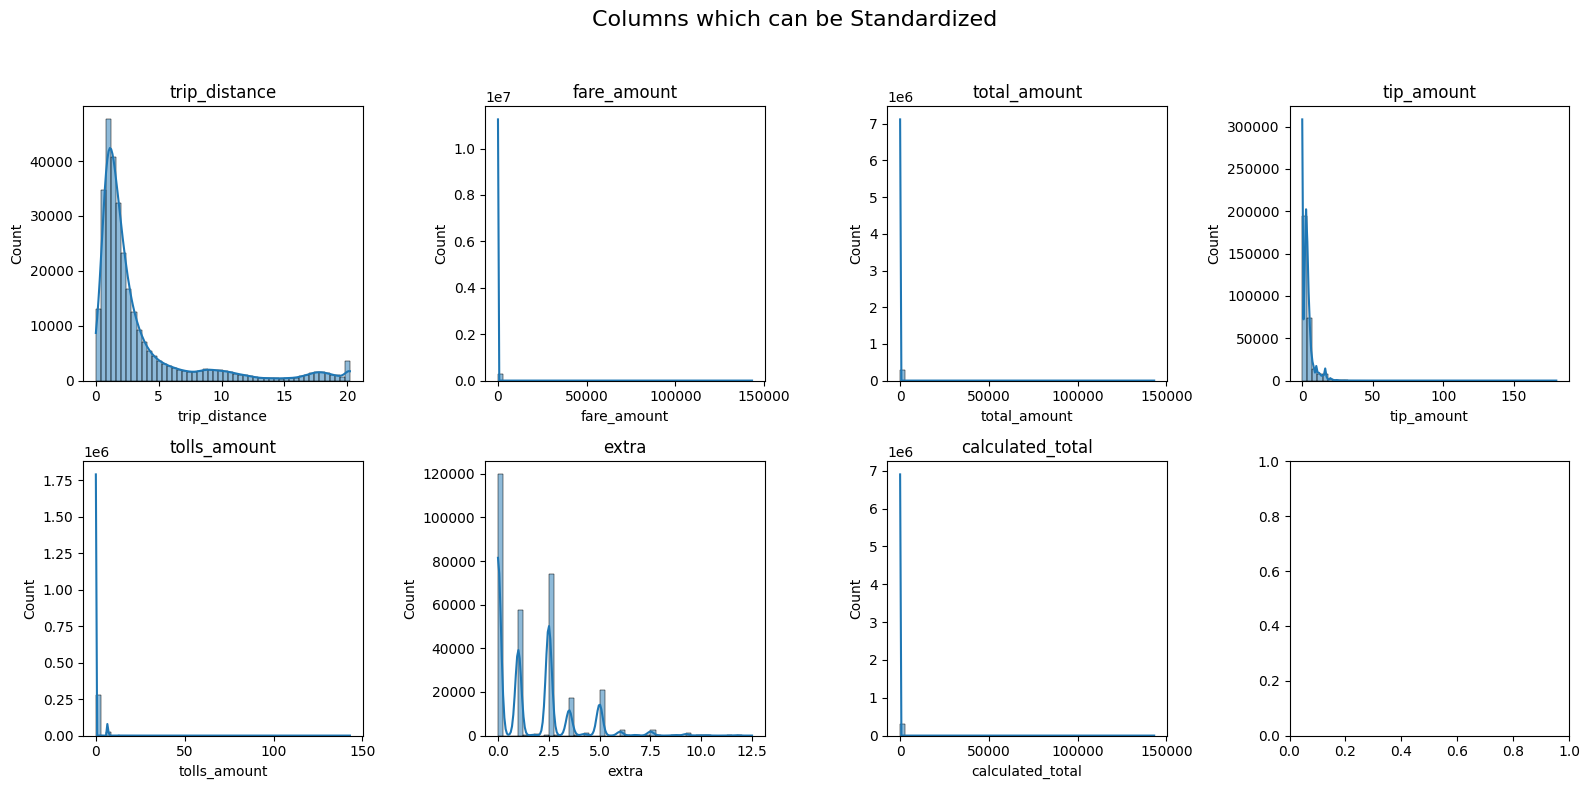

In [49]:
#Based on the above data, visualising the data which can be used for standardising
#since we have identified that trip_distance, fare_amount, total_amount, tip_amount, tolls_amount, extra, calculated_total are considered

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Columns to standardize
cols_to_standardize = [
    "trip_distance", "fare_amount", "total_amount", "tip_amount",
    "tolls_amount", "extra", "calculated_total"
]

# Plot before standardization
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Columns which can be Standardized", fontsize=16)

for i, col in enumerate(cols_to_standardize):
    sns.histplot(trip_df[col], ax=axes[i//4, i%4], bins=50, kde=True)
    axes[i//4, i%4].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [50]:
trip_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour',
 'airport_fee',
 'pickup_zone',
 'pickup_borough',
 'dropoff_zone',
 'dropoff_borough',
 'trip_duration_hours',
 'calculated_total']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [51]:
#Dynamically calulate Trip duration based on the drop off date time and pickup date time
trip_df["trip_duration"] = (trip_df["tpep_dropoff_datetime"] - trip_df["tpep_pickup_datetime"]).dt.total_seconds() / 60
trip_df['pickup_hour'] = pd.to_datetime(trip_df['tpep_pickup_datetime']).dt.hour

In [52]:
#To make sure we do not have any kind of duplicates
trip_df = trip_df.drop_duplicates()

In [53]:
#Reset the index so that analysing data can be done easily
trip_df = trip_df.reset_index(drop=True)

In [54]:
print(trip_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour',
       'airport_fee', 'pickup_zone', 'pickup_borough', 'dropoff_zone',
       'dropoff_borough', 'trip_duration_hours', 'calculated_total',
       'trip_duration', 'pickup_hour'],
      dtype='object')


In [55]:
# Categorise the varaibles into Numerical or Categorical.
# Identify numerical variables
numerical_vars = trip_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical variables (including numeric columns that represent categories)
categorical_vars = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']

# Remove categorical variables from the numerical list
numerical_vars = [col for col in numerical_vars if col not in categorical_vars]

# Add missing time-based numerical variables
if 'pickup_hour' in trip_df.columns:
    numerical_vars.append('pickup_hour')

if 'trip_duration' in trip_df.columns:
    numerical_vars.append('trip_duration')

# Display results
print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)

Numerical Variables: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee', 'trip_duration_hours', 'calculated_total', 'trip_duration', 'pickup_hour', 'trip_duration']
Categorical Variables: ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

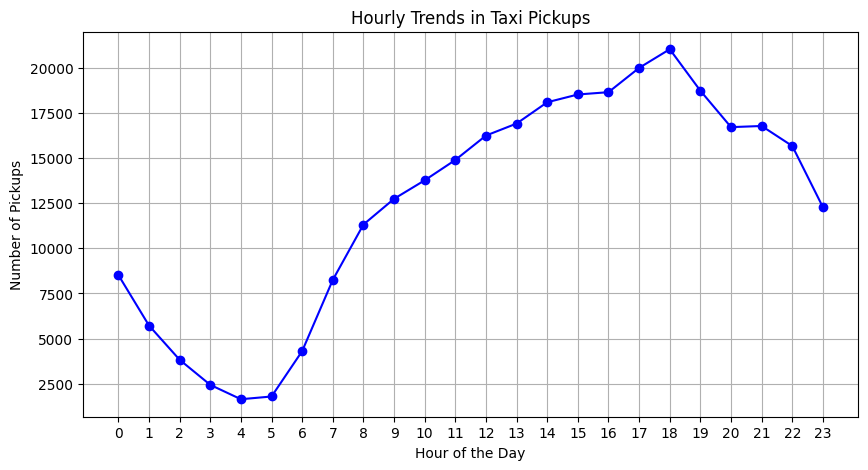

In [56]:
# Find and show the hourly trends in taxi pickups

#Extracting Hour from pickup time
trip_df['pickup_hour'] = trip_df['tpep_pickup_datetime'].dt.hour

#Counting number of pickups per hour
hourly_trends = trip_df['pickup_hour'].value_counts().sort_index()

#Visualising Trend using bar plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()

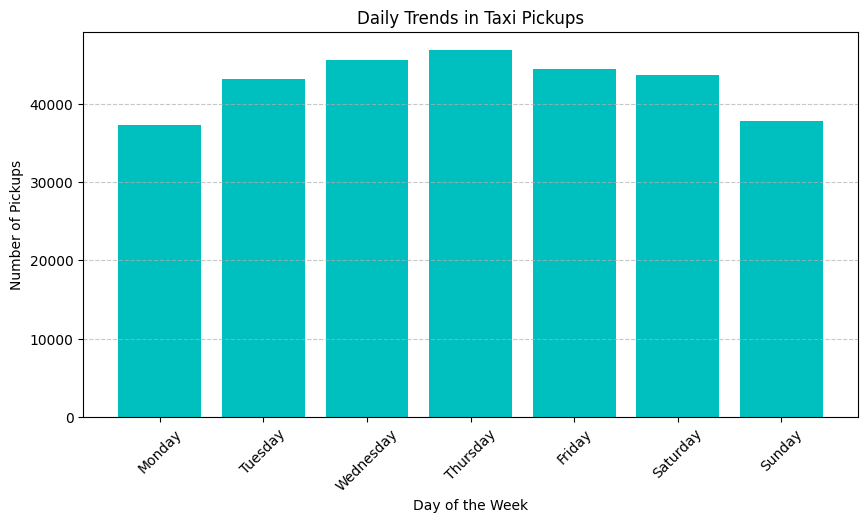

In [57]:
# Find and show the daily trends in taxi pickups (days of the week)

#Extracting the day details
trip_df['pickup_day'] = trip_df['tpep_pickup_datetime'].dt.dayofweek

trip_df['pickup_day_name'] = trip_df['tpep_pickup_datetime'].dt.day_name()

#Counting pickups per day
daily_trends = trip_df['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(daily_trends.index, daily_trends.values, color='c')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

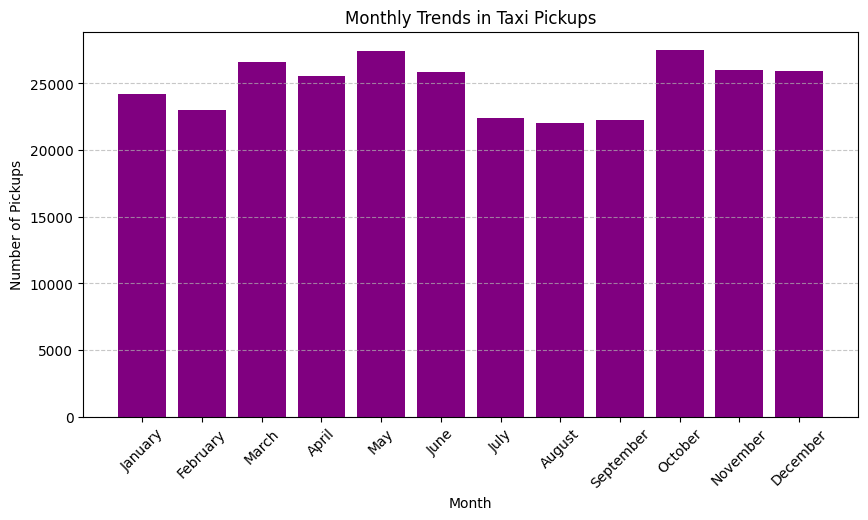

In [58]:
# Show the monthly trends in pickups

#Extracting Month information
trip_df['pickup_month'] = trip_df['tpep_pickup_datetime'].dt.month
trip_df['pickup_month_name'] = trip_df['tpep_pickup_datetime'].dt.strftime('%B')

#Counting pickups per month
monthly_trends = trip_df['pickup_month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values, color='purple')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [59]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    zero_values = (trip_df[col] == 0).sum()
    negative_values = (trip_df[col] < 0).sum()
    print(f"{col}: {zero_values} zero values, {negative_values} negative values")

fare_amount: 98 zero values, 0 negative values
tip_amount: 68710 zero values, 0 negative values
total_amount: 45 zero values, 14 negative values
trip_distance: 5936 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [60]:
# Create a df with non zero entries for the selected parameters.
trip_df_filtered = trip_df[
    (trip_df['trip_distance'] > 0) &
    (trip_df['fare_amount'] > 0) &
    (trip_df['total_amount'] > 0)
].copy()
trip_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292925 entries, 0 to 298912
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               292925 non-null  int64         
 1   tpep_pickup_datetime   292925 non-null  datetime64[us]
 2   tpep_dropoff_datetime  292925 non-null  datetime64[us]
 3   passenger_count        292925 non-null  float64       
 4   trip_distance          292925 non-null  float64       
 5   RatecodeID             292925 non-null  float64       
 6   store_and_fwd_flag     292925 non-null  object        
 7   PULocationID           292925 non-null  int64         
 8   DOLocationID           292925 non-null  int64         
 9   payment_type           292925 non-null  int64         
 10  fare_amount            292925 non-null  float64       
 11  extra                  292925 non-null  float64       
 12  mta_tax                292925 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

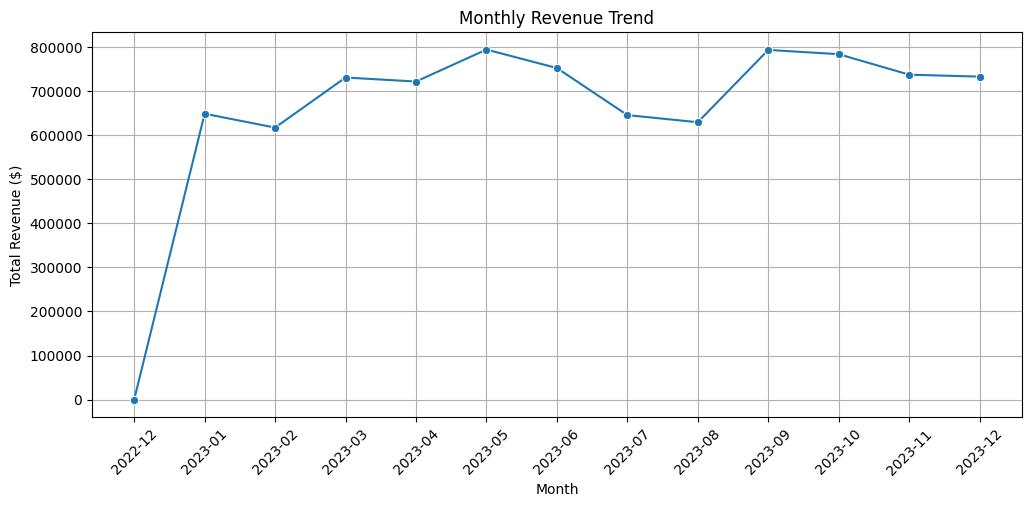

In [64]:
# Group data by month and analyse monthly revenue
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is in correct format
trip_df_filtered['month'] = trip_df_filtered['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and sum total revenue
monthly_revenue = trip_df_filtered.groupby('month')['total_amount'].sum().reset_index()

# Convert 'month' to datetime for proper plotting
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

# Plot revenue trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

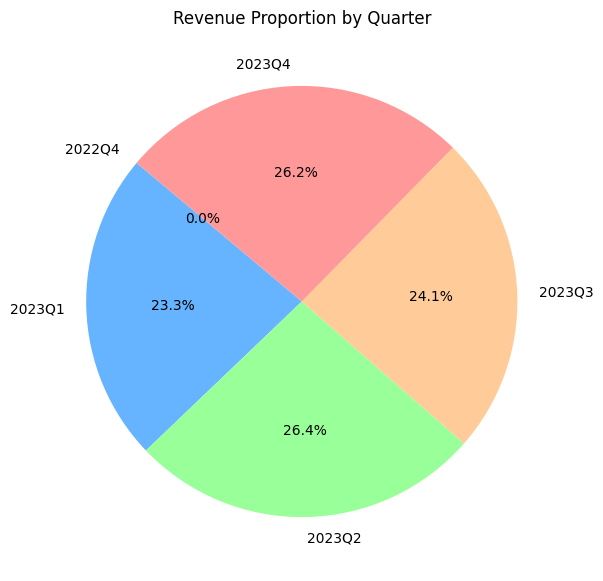

In [65]:
# Calculate proportion of each quarter

# Create a 'quarter' column
trip_df_filtered['quarter'] = trip_df_filtered['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum total revenue
quarterly_revenue = trip_df_filtered.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate total revenue across all quarters
total_revenue = quarterly_revenue['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

# Plot pie chart for revenue proportion
plt.figure(figsize=(7, 7))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'],
        autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Revenue Proportion by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

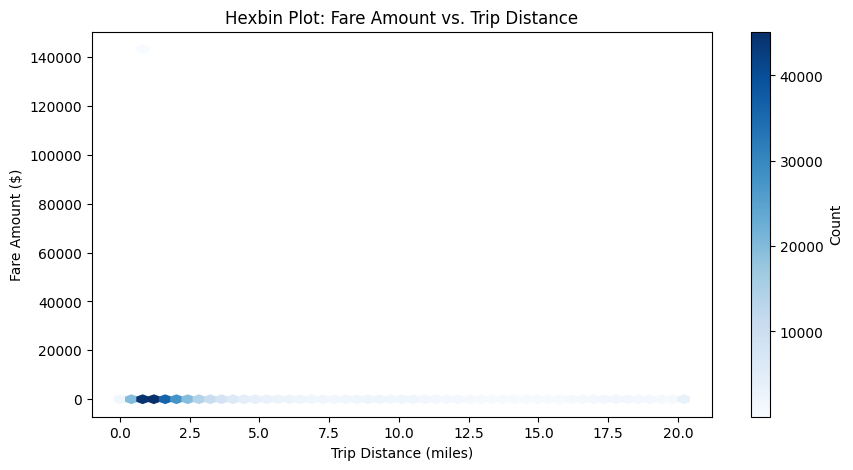

In [66]:
# Show how trip fare is affected by distance

# Remove trips with zero distance
trip_df_filtered = trip_df[trip_df['trip_distance'] > 0]

# HexBin Density correlation
plt.figure(figsize=(10, 5))
plt.hexbin(trip_df_filtered['trip_distance'], trip_df_filtered['fare_amount'],
           gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Hexbin Plot: Fare Amount vs. Trip Distance')
plt.show()

Correlation between trip distance and fare amount: 0.0610


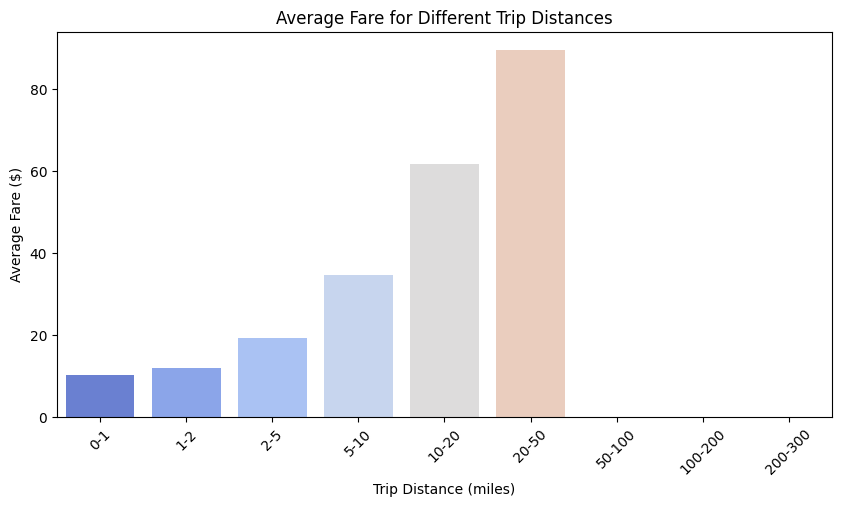

In [67]:
# Calculate correlation based on the above data
correlation = trip_df_filtered['trip_distance'].corr(trip_df_filtered['fare_amount'])
print(f'Correlation between trip distance and fare amount: {correlation:.4f}')

# Grouping trip_distance into bins for better analysis
bins = [0, 1, 2, 5, 10, 20, 50, 100, 200, 300]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-300']
trip_df_filtered['distance_bin'] = pd.cut(trip_df_filtered['trip_distance'], bins=bins, labels=labels)

# Average fare for each distance range
fare_by_distance = trip_df_filtered.groupby('distance_bin')['fare_amount'].mean().reset_index()

# Bar plot for average fare per distance range
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_distance, x='distance_bin', y='fare_amount', palette='coolwarm')

plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare for Different Trip Distances')
plt.xticks(rotation=45)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

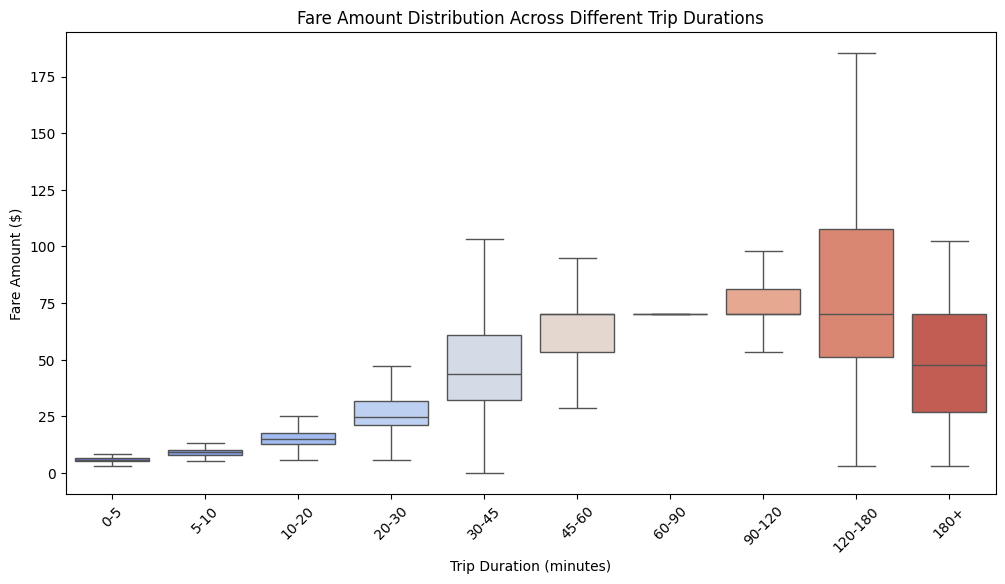

In [68]:
# Show relationship between fare and trip duration

# Create trip duration categories (bins)
bins = [0, 5, 10, 20, 30, 45, 60, 90, 120, 180, 500]  # Duration in minutes
labels = ["0-5", "5-10", "10-20", "20-30", "30-45", "45-60", "60-90", "90-120", "120-180", "180+"]
trip_df["duration_category"] = pd.cut(trip_df["trip_duration"], bins=bins, labels=labels)

# Set plot size
plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(x="duration_category", y="fare_amount", data=trip_df, showfliers=False, palette="coolwarm")

# Labels & title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution Across Different Trip Durations")

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

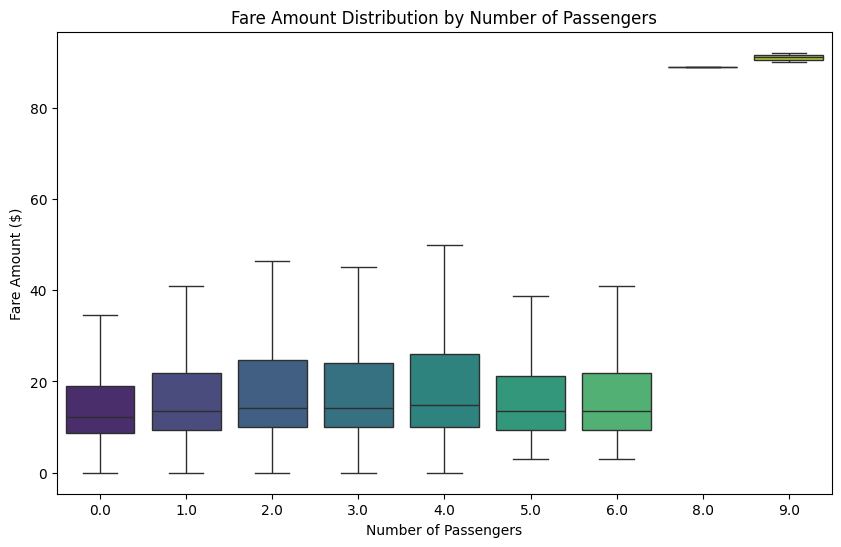

In [69]:
# Show relationship between fare and number of passengers

# Set plot size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x="passenger_count", y="fare_amount", data=trip_df, showfliers=False, palette="viridis")

# Labels & title
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution by Number of Passengers")

# Show plot
plt.show()

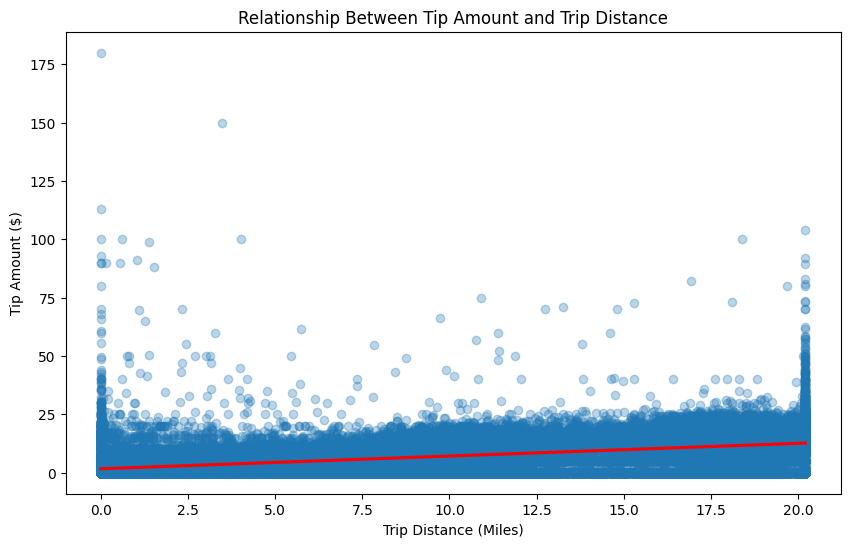

In [70]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x="trip_distance", y="tip_amount", data=trip_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Labels & title
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Tip Amount and Trip Distance")

# Show plot
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

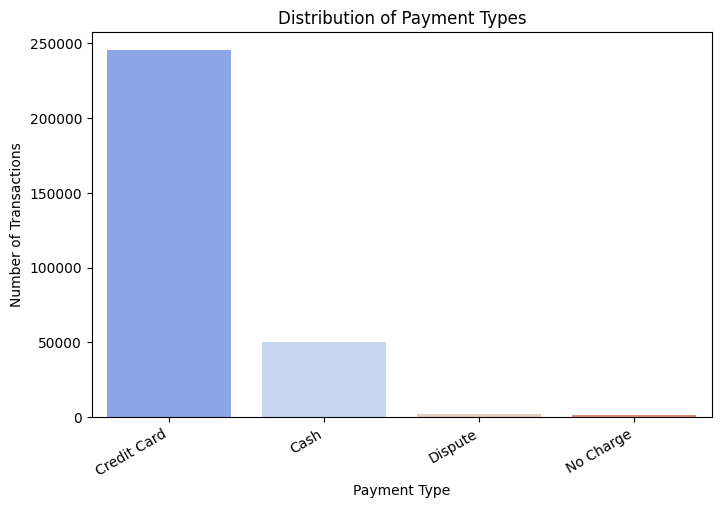

In [71]:
# Analyse the distribution of different payment types (payment_type).

# Count occurrences of each payment type
payment_counts = trip_df["payment_type"].value_counts()

# Define payment type labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Map labels to index
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")

# Add labels
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=30, ha="right")

# Show plot
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [72]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
taxi_zones = gpd.read_file('/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
taxi_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


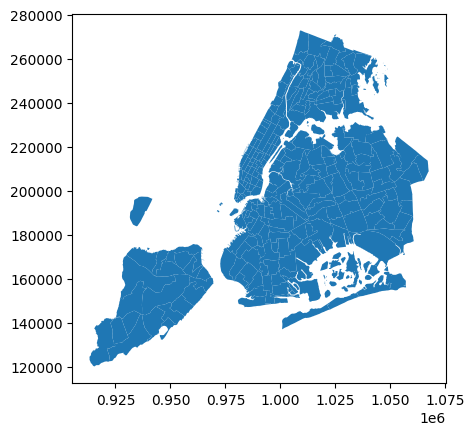

In [73]:
# print(zones.info())
# zones.plot()
print(taxi_zones.info())
taxi_zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [74]:
# Merge zones and trip records using locationID and PULocationID

# Merge with pickup location
trip_df = trip_df.merge(taxi_zones[['LocationID', 'zone', 'borough']],
                        left_on='PULocationID',
                        right_on='LocationID',
                        how='left',
                        suffixes=('', '_pickup'))

# Rename for clarity
trip_df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Merge with dropoff location
trip_df = trip_df.merge(taxi_zones[['LocationID', 'zone', 'borough']],
                        left_on='DOLocationID',
                        right_on='LocationID',
                        how='left',
                        suffixes=('', '_dropoff'))

# Rename for clarity
trip_df.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)

# Drop duplicate LocationID columns
trip_df.drop(columns=['LocationID', 'LocationID_dropoff'], inplace=True)

# Display sample rows
trip_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-08 11:25:22   2023-12-08 11:53:20              2.0   
1         2  2023-08-01 19:43:23   2023-08-01 19:50:05              1.0   
2         2  2023-06-16 19:47:43   2023-06-16 20:18:27              1.0   
3         1  2023-05-07 00:03:10   2023-05-07 00:15:38              2.0   
4         2  2023-07-08 22:55:49   2023-07-08 23:21:50              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.92         1.0                  N           100            43   
1           1.03         1.0                  N           234           186   
2           0.00         1.0                  N           264           264   
3           2.10         1.0                  N            48           140   
4           8.29         1.0                  N           170           147   

   payment_type  ...  pickup_hour  pickup_day  pickup_day_name  pickup_month  \
0             1  ...           11           4           Friday            12   
1             1  ...           19           1          Tuesday             8   
2             1  ...           19           4           Friday             6   
3             1  ...            0           6           Sunday             5   
4             2  ...           22           5         Saturday             7   

   pickup_month_name  duration_category       pickup_zone  pickup_borough  \
0           December              20-30  Garment District       Manhattan   
1             August               5-10          Union Sq       Manhattan   
2               June              30-45               NaN             NaN   
3                May              10-20      Clinton East       Manhattan   
4               July              20-30       Murray Hill       Manhattan   

                   dropoff_zone dropoff_borough  
0                  Central Park       Manhattan  
1  Penn Station/Madison Sq West       Manhattan  
2                           NaN             NaN  
3               Lenox Hill East       Manhattan  
4                      Longwood           Bronx  

[5 rows x 39 columns]

In [78]:
trip_df = trip_df.loc[:, ~trip_df.columns.duplicated()]

In [79]:
print(trip_df[['pickup_zone']].head())

        pickup_zone
0  Garment District
1          Union Sq
2               NaN
3      Clinton East
4       Murray Hill


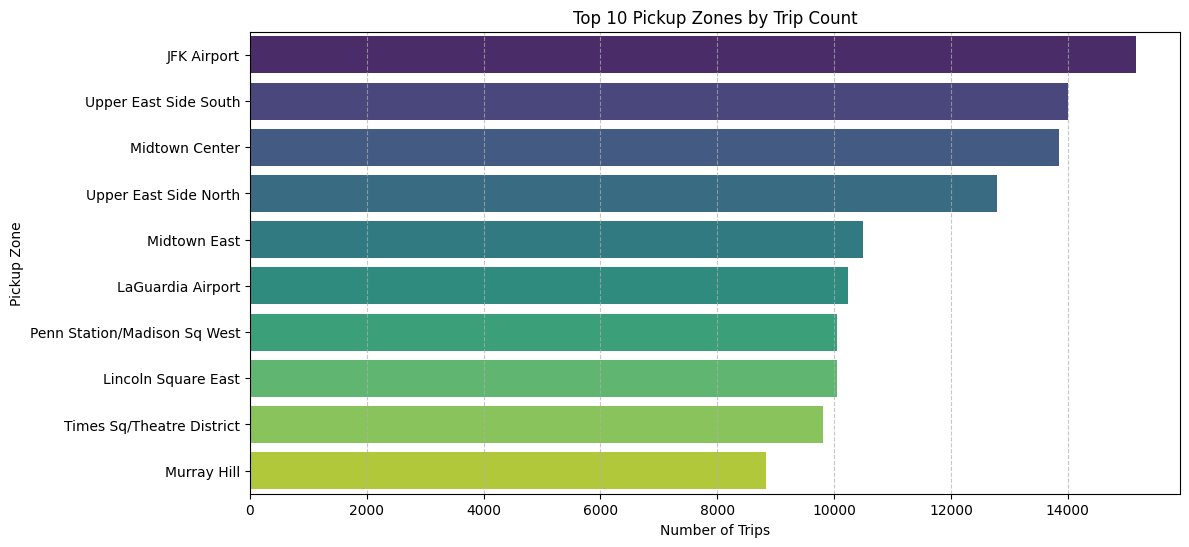

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate trip counts by pickup zone
top_pickup_zones = trip_df['pickup_zone'].value_counts().head(10)

# Plot settings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.values, y=top_pickup_zones.index, palette="viridis")

# Titles and labels
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")
plt.title("Top 10 Pickup Zones by Trip Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [81]:
# Group data by location and calculate the number of trips

# Count trips by pickup location
pickup_counts = trip_df.groupby(['pickup_zone', 'pickup_borough']).size().reset_index(name='pickup_trips')

# Count trips by dropoff location
dropoff_counts = trip_df.groupby(['dropoff_zone', 'dropoff_borough']).size().reset_index(name='dropoff_trips')

# Merge pickup and dropoff counts
location_trip_counts = pickup_counts.merge(dropoff_counts,
                                           left_on='pickup_zone',
                                           right_on='dropoff_zone',
                                           how='outer')

# Fill NaN values with 0
location_trip_counts.fillna(0, inplace=True)

# Display top locations
location_trip_counts.sort_values(by=['pickup_trips', 'dropoff_trips'], ascending=False).head(10)

pickup_zone pickup_borough  pickup_trips  \
121                   JFK Airport         Queens       15161.0   
229         Upper East Side South      Manhattan       13997.0   
153                Midtown Center      Manhattan       13855.0   
228         Upper East Side North      Manhattan       12788.0   
154                  Midtown East      Manhattan       10487.0   
130             LaGuardia Airport         Queens       10236.0   
179  Penn Station/Madison Sq West      Manhattan       10043.0   
134           Lincoln Square East      Manhattan       10041.0   
222     Times Sq/Theatre District      Manhattan        9804.0   
162                   Murray Hill      Manhattan        8839.0   

                     dropoff_zone dropoff_borough  dropoff_trips  
121                   JFK Airport          Queens         3616.0  
229         Upper East Side South       Manhattan        12399.0  
153                Midtown Center       Manhattan        11626.0  
228         Upper East Side North       Manhattan        13209.0  
154                  Midtown East       Manhattan         8410.0  
130             LaGuardia Airport          Queens         3830.0  
179  Penn Station/Madison Sq West       Manhattan         6516.0  
134           Lincoln Square East       Manhattan         8298.0  
222     Times Sq/Theatre District       Manhattan         9171.0  
162                   Murray Hill       Manhattan         8783.0

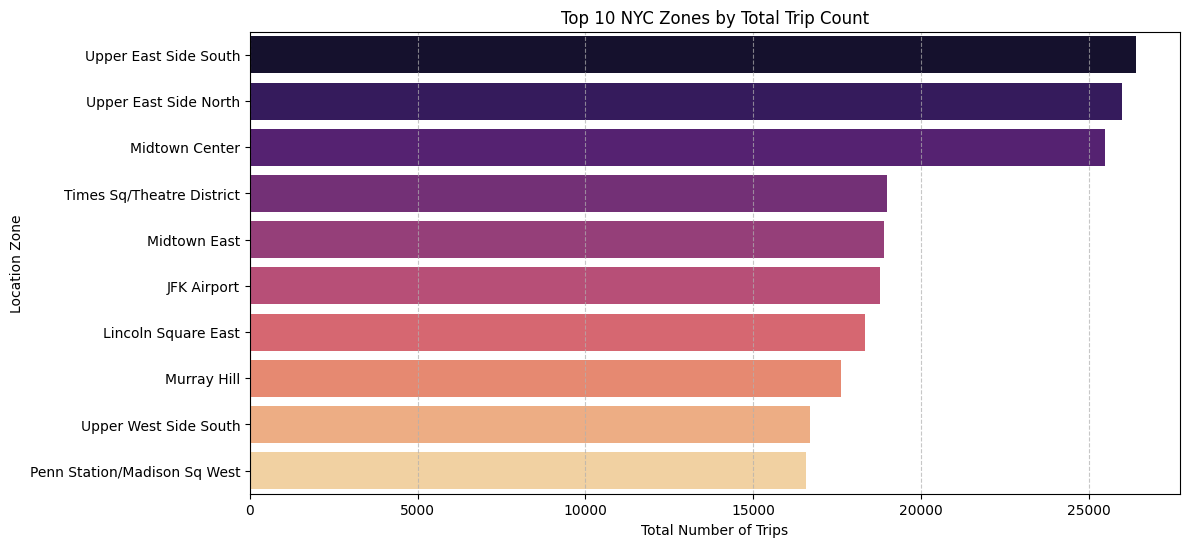

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total trips (sum of pickup and dropoff trips)
location_trip_counts['total_trips'] = location_trip_counts['pickup_trips'] + location_trip_counts['dropoff_trips']

# Sort by total trips and take the top 10 locations
top_locations = location_trip_counts.sort_values(by='total_trips', ascending=False).head(10)

# Plot settings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations['total_trips'], y=top_locations['pickup_zone'], palette="magma")

# Titles and labels
plt.xlabel("Total Number of Trips")
plt.ylabel("Location Zone")
plt.title("Top 10 NYC Zones by Total Trip Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [83]:
# Merge trip counts back to the zones GeoDataFrame
#Aggregate trip counts from trip_df
trip_counts = trip_df.groupby(['PULocationID']).size().reset_index(name='pickup_trips')
dropoff_counts = trip_df.groupby(['DOLocationID']).size().reset_index(name='dropoff_trips')

#Merge pickup and dropoff counts on LocationID
trip_counts = trip_counts.merge(dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

#Fill NaNs for missing values
trip_counts.fillna(0, inplace=True)

#Create total trips column
trip_counts['total_trips'] = trip_counts['pickup_trips'] + trip_counts['dropoff_trips']

#Merge trip counts with taxi_zones (GeoDataFrame)
geo_trip_data = taxi_zones.merge(trip_counts,
                                 left_on='LocationID',
                                 right_on='PULocationID',
                                 how='left')

#Fill NaN values for missing zones
geo_trip_data[['pickup_trips', 'dropoff_trips', 'total_trips']] = geo_trip_data[['pickup_trips', 'dropoff_trips', 'total_trips']].fillna(0)

#Display sorted trip data
geo_trip_data_sorted = geo_trip_data[['zone', 'borough', 'total_trips']].sort_values(by='total_trips', ascending=False)
print(geo_trip_data_sorted.head(10))


                             zone    borough  total_trips
236         Upper East Side South  Manhattan      26396.0
235         Upper East Side North  Manhattan      25997.0
160                Midtown Center  Manhattan      25481.0
229     Times Sq/Theatre District  Manhattan      18975.0
161                  Midtown East  Manhattan      18897.0
131                   JFK Airport     Queens      18777.0
141           Lincoln Square East  Manhattan      18339.0
169                   Murray Hill  Manhattan      17622.0
238         Upper West Side South  Manhattan      16693.0
185  Penn Station/Madison Sq West  Manhattan      16559.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

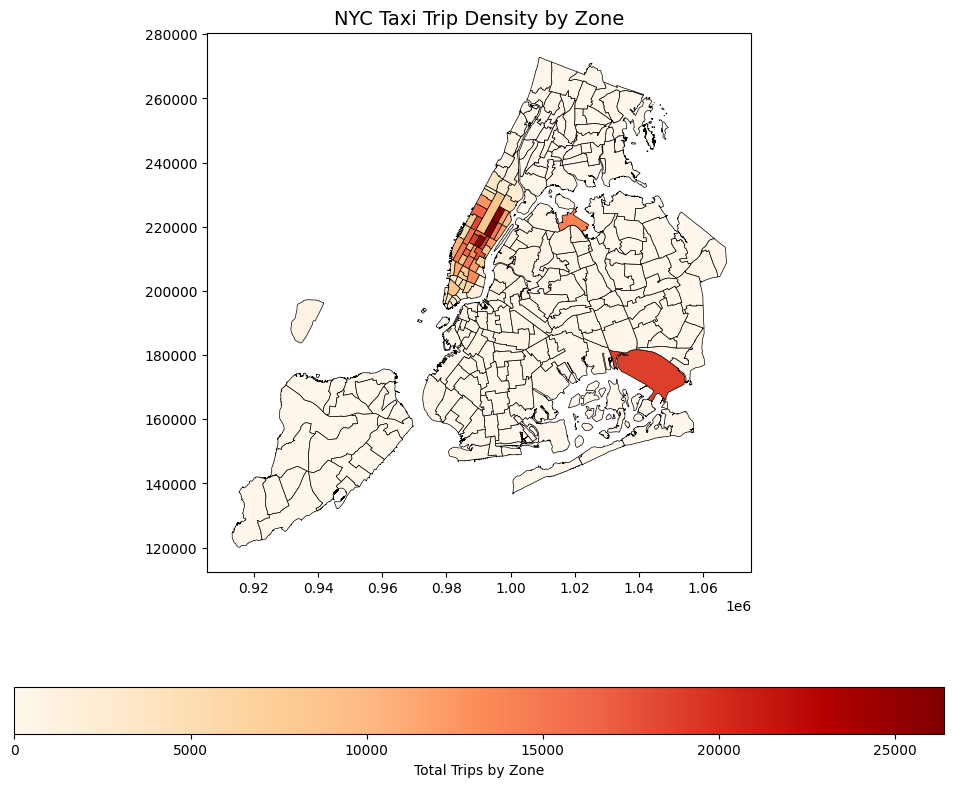

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame using the 'total_trips' column
geo_trip_data.plot(column='total_trips',
                   cmap='OrRd',  # Color map (Orange-Red for intensity)
                   linewidth=0.5,
                   edgecolor='black',
                   legend=True,
                   legend_kwds={'label': "Total Trips by Zone", 'orientation': "horizontal"},
                   ax=ax)

# Add a title
plt.title("NYC Taxi Trip Density by Zone", fontsize=14)

# Show the plot
plt.show()

In [85]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the GeoDataFrame by total_trips in descending order
sorted_zones = geo_trip_data.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones with the highest number of trips
print(sorted_zones[['LocationID', 'zone', 'borough', 'total_trips']].head(10))

     LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan      26396.0
235         236         Upper East Side North  Manhattan      25997.0
160         161                Midtown Center  Manhattan      25481.0
229         230     Times Sq/Theatre District  Manhattan      18975.0
161         162                  Midtown East  Manhattan      18897.0
131         132                   JFK Airport     Queens      18777.0
141         142           Lincoln Square East  Manhattan      18339.0
169         170                   Murray Hill  Manhattan      17622.0
238         239         Upper West Side South  Manhattan      16693.0
185         186  Penn Station/Madison Sq West  Manhattan      16559.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

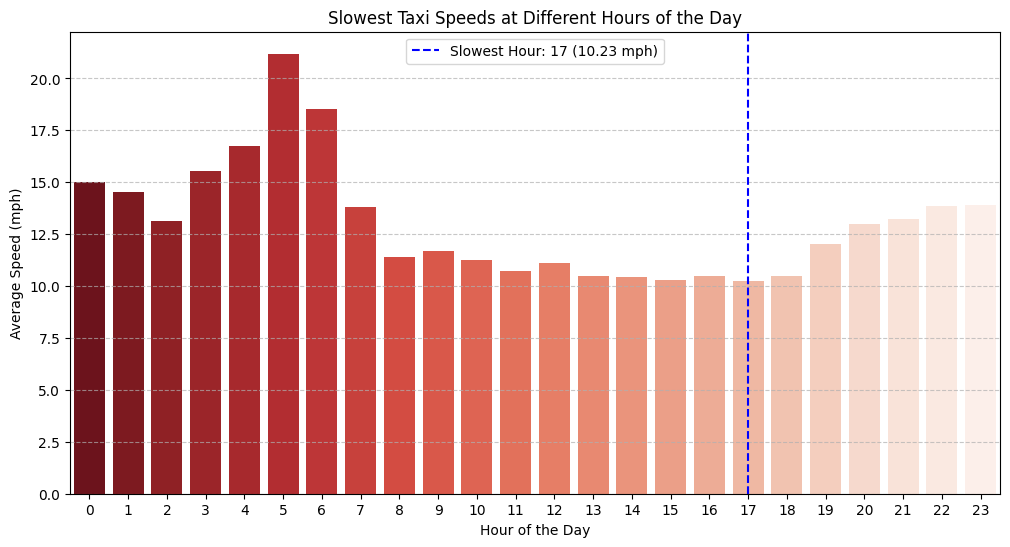

In [86]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
trip_df["trip_duration_hours"] = (trip_df["tpep_dropoff_datetime"] - trip_df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Group by pickup hour and calculate average speed
speed_per_hour = trip_df.groupby("pickup_hour").apply(lambda x: (x["trip_distance"].sum() / x["trip_duration_hours"].sum()))

# Sort speeds to find the slowest hours
slowest_hours = speed_per_hour.sort_values(ascending=True)

# Find the slowest hour
slowest_hour = slowest_hours.idxmin()
slowest_speed = slowest_hours.min()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=slowest_hours.index, y=slowest_hours.values, palette="Reds_r")

# Highlight slowest hour
plt.axvline(x=slowest_hour, color='blue', linestyle='--', label=f'Slowest Hour: {slowest_hour} ({slowest_speed:.2f} mph)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (mph)")
plt.title("Slowest Taxi Speeds at Different Hours of the Day")
plt.xticks(range(24))  # Show all hours
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

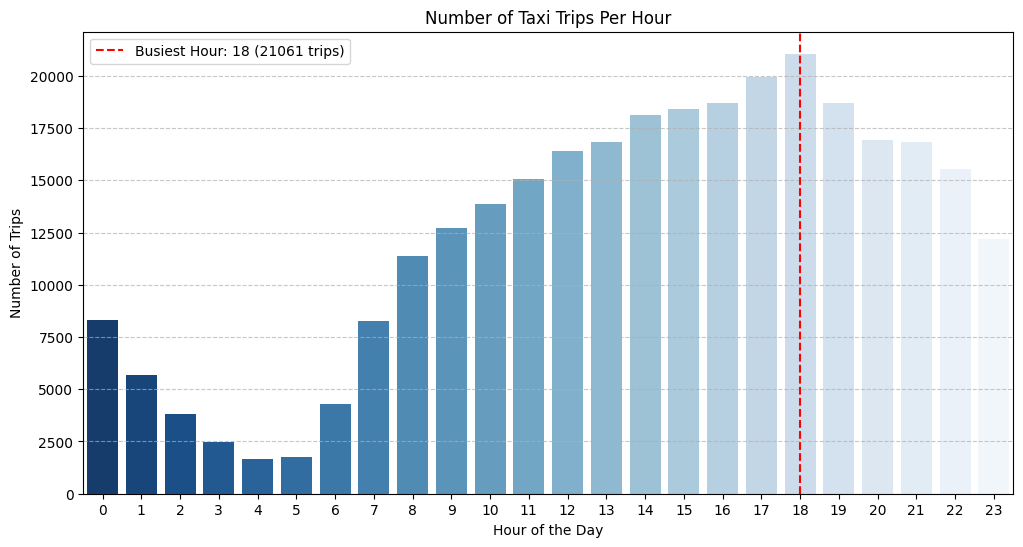

In [395]:
# Visualise the number of trips per hour and find the busiest hour

# Group data by pickup hour and count trips
trips_per_hour = trip_df.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_trips = trips_per_hour.max()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="Blues_r")

# Highlight busiest hour
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips Per Hour")
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [396]:
# Scale up the number of trips
# Define the sampling fraction (adjust if different)
sample_fraction = 0.05

# Scale up the trip counts
scaled_trip_counts = trip_df_filtered.groupby('pickup_hour')['VendorID'].count() / sample_fraction

# Convert to DataFrame for better visualization
scaled_trip_counts = scaled_trip_counts.reset_index()
scaled_trip_counts.columns = ['pickup_hour', 'scaled_trip_count']

# Display the top 5 busiest hours
scaled_trip_counts.sort_values(by='scaled_trip_count', ascending=False).head(5)

pickup_hour  scaled_trip_count
18           18           413040.0
17           17           391040.0
19           19           367740.0
16           16           367540.0
15           15           362240.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

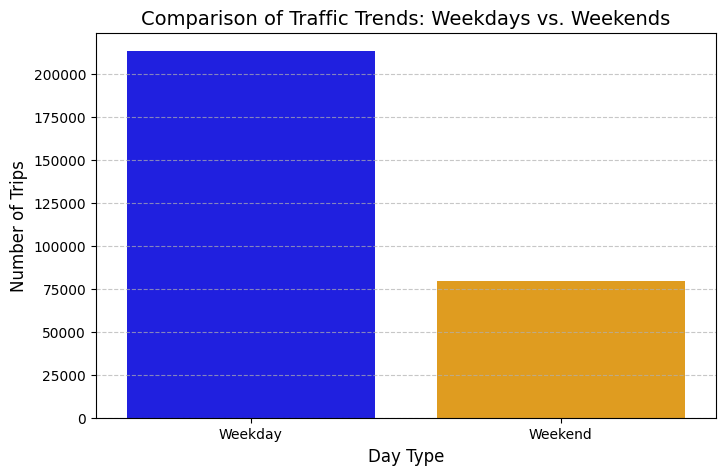

In [87]:
# Compare traffic trends for the week days and weekends
# Categorize days into weekday/weekend
trip_df_filtered['day_type'] = trip_df_filtered['pickup_day_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group and count trips
weekday_vs_weekend = trip_df_filtered.groupby('day_type')['VendorID'].count().reset_index()
weekday_vs_weekend.columns = ['day_type', 'trip_count']

# Plot the trend
plt.figure(figsize=(8,5))
sns.barplot(x='day_type', y='trip_count', data=weekday_vs_weekend, palette=['blue', 'orange'])

# Labels and title
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Comparison of Traffic Trends: Weekdays vs. Weekends', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
trip_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293735 entries, 420365 to 2781578
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               293735 non-null  int64         
 1   tpep_pickup_datetime   293735 non-null  datetime64[us]
 2   tpep_dropoff_datetime  293735 non-null  datetime64[us]
 3   passenger_count        293735 non-null  float64       
 4   trip_distance          293735 non-null  float64       
 5   RatecodeID             293735 non-null  float64       
 6   store_and_fwd_flag     293735 non-null  object        
 7   PULocationID           293735 non-null  int64         
 8   DOLocationID           293735 non-null  int64         
 9   payment_type           293735 non-null  int64         
 10  fare_amount            293735 non-null  float64       
 11  extra                  293735 non-null  float64       
 12  mta_tax                293735 non-null  flo

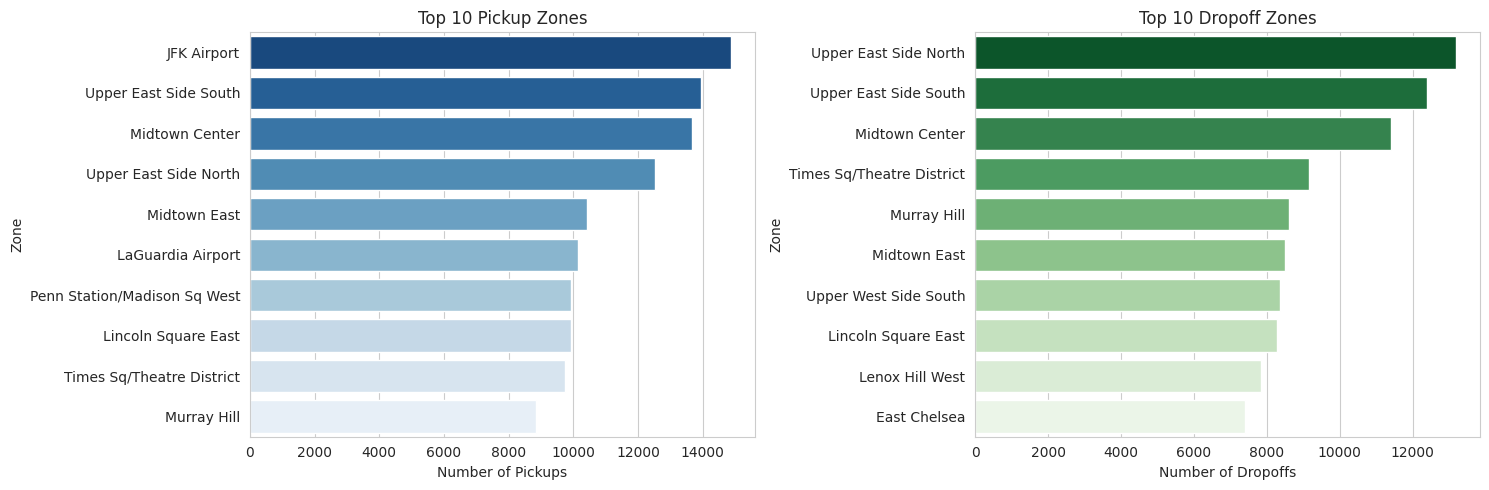

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count pickups and dropoffs
top_pickup_zones = trip_df_filtered['PULocationID'].value_counts().head(10)
top_dropoff_zones = trip_df_filtered['DOLocationID'].value_counts().head(10)

# Map LocationID to actual zone names from taxi_zones DataFrame
pickup_zone_names = taxi_zones.set_index('LocationID').loc[top_pickup_zones.index]['zone']
dropoff_zone_names = taxi_zones.set_index('LocationID').loc[top_dropoff_zones.index]['zone']

# Set plot style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot top pickup zones
sns.barplot(x=top_pickup_zones.values, y=pickup_zone_names, ax=ax[0], palette="Blues_r")
ax[0].set_title("Top 10 Pickup Zones")
ax[0].set_xlabel("Number of Pickups")
ax[0].set_ylabel("Zone")

# Plot top dropoff zones
sns.barplot(x=top_dropoff_zones.values, y=dropoff_zone_names, ax=ax[1], palette="Greens_r")
ax[1].set_title("Top 10 Dropoff Zones")
ax[1].set_xlabel("Number of Dropoffs")
ax[1].set_ylabel("Zone")

# Show the plots
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

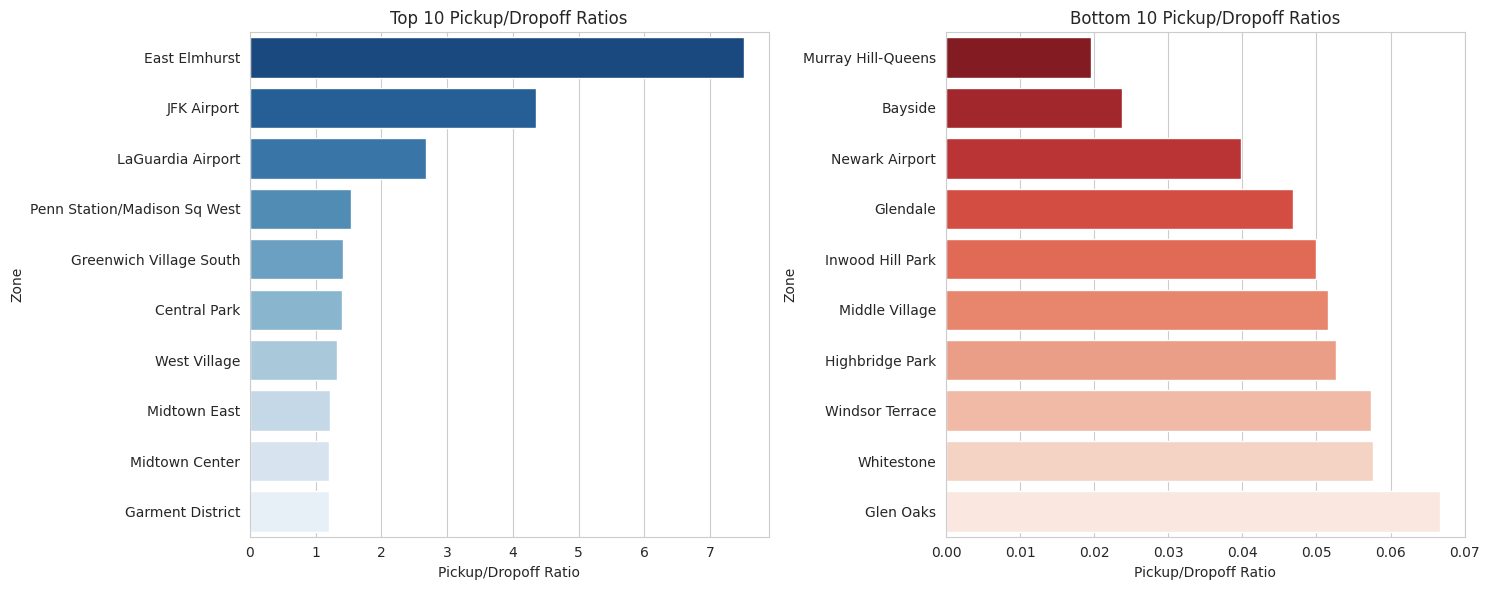

In [402]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import matplotlib.pyplot as plt
import seaborn as sns

# Merge with taxi_zones for zone names
top_10_ratios = top_10_ratios.merge(taxi_zones[['LocationID', 'zone']], left_index=True, right_on="LocationID")
bottom_10_ratios = bottom_10_ratios.merge(taxi_zones[['LocationID', 'zone']], left_index=True, right_on="LocationID")

# Set plot style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot top 10 pickup/dropoff ratios
sns.barplot(y=top_10_ratios["zone"], x=top_10_ratios["pickup_dropoff_ratio"], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top 10 Pickup/Dropoff Ratios")
ax[0].set_xlabel("Pickup/Dropoff Ratio")
ax[0].set_ylabel("Zone")

# Plot bottom 10 pickup/dropoff ratios
sns.barplot(y=bottom_10_ratios["zone"], x=bottom_10_ratios["pickup_dropoff_ratio"], ax=ax[1], palette="Reds_r")
ax[1].set_title("Bottom 10 Pickup/Dropoff Ratios")
ax[1].set_xlabel("Pickup/Dropoff Ratio")
ax[1].set_ylabel("Zone")

# Show the plots
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

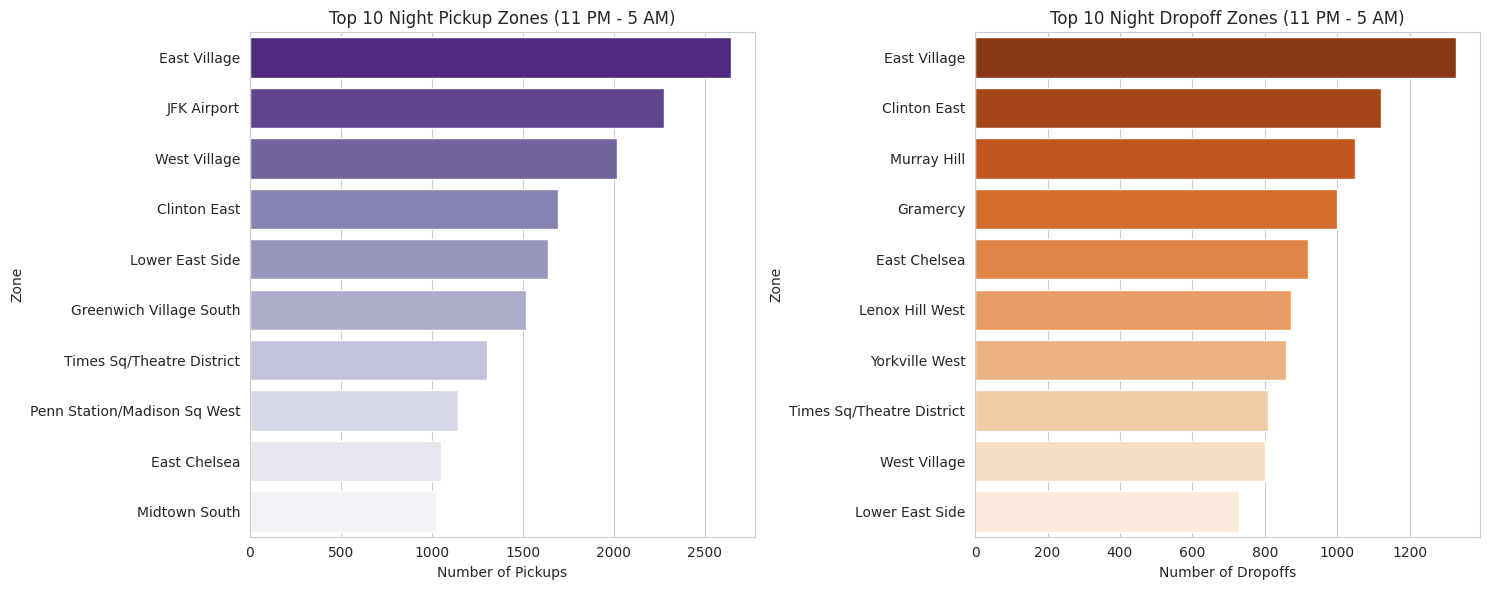

In [403]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
import matplotlib.pyplot as plt
import seaborn as sns

# Merge with taxi_zones for zone names
top_10_night_pickups = top_10_night_pickups.merge(taxi_zones[['LocationID', 'zone']], left_index=True, right_on="LocationID")
top_10_night_dropoffs = top_10_night_dropoffs.merge(taxi_zones[['LocationID', 'zone']], left_index=True, right_on="LocationID")

# Set plot style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot top 10 night pickup zones
sns.barplot(y=top_10_night_pickups["zone"], x=top_10_night_pickups["night_pickup_count"], ax=ax[0], palette="Purples_r")
ax[0].set_title("Top 10 Night Pickup Zones (11 PM - 5 AM)")
ax[0].set_xlabel("Number of Pickups")
ax[0].set_ylabel("Zone")

# Plot top 10 night dropoff zones
sns.barplot(y=top_10_night_dropoffs["zone"], x=top_10_night_dropoffs["night_dropoff_count"], ax=ax[1], palette="Oranges_r")
ax[1].set_title("Top 10 Night Dropoff Zones (11 PM - 5 AM)")
ax[1].set_xlabel("Number of Dropoffs")
ax[1].set_ylabel("Zone")

# Show the plots
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [405]:
# Filter for night hours (11 PM to 5 AM)
# Define nighttime and daytime trips
night_revenue = night_trips["total_amount"].sum()
day_trips = trip_df[(trip_df["pickup_hour"] >= 6) & (trip_df["pickup_hour"] <= 22)]
day_revenue = day_trips["total_amount"].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share percentage
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_revenue_share:.2f}%")

Nighttime Revenue Share (11 PM - 5 AM): 12.19%
Daytime Revenue Share (6 AM - 10 PM): 87.81%


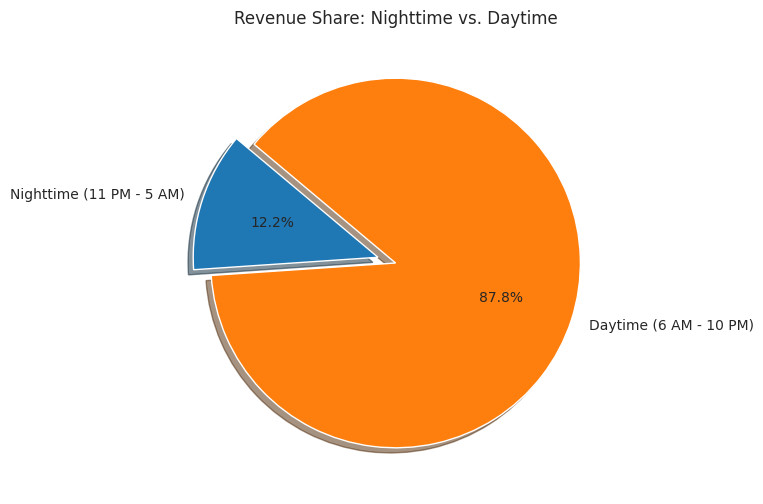

In [406]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ["Nighttime (11 PM - 5 AM)", "Daytime (6 AM - 10 PM)"]
sizes = [night_revenue, day_revenue]
colors = ["#1f77b4", "#ff7f0e"]
explode = (0.1, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True, startangle=140)
plt.title("Revenue Share: Nighttime vs. Daytime")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [407]:
# Analyse the fare per mile per passenger for different passenger counts

# Remove trips with zero distance or zero passengers (to avoid division errors)
valid_trips = trip_df[(trip_df["trip_distance"] > 0) & (trip_df["passenger_count"] > 0)]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Calculate fare per mile per passenger
valid_trips["fare_per_mile_per_passenger"] = valid_trips["fare_per_mile"] / valid_trips["passenger_count"]

# Group by passenger count and calculate statistics
fare_analysis = valid_trips.groupby("passenger_count")["fare_per_mile_per_passenger"].agg(["mean", "median", "std", "count"]).reset_index()

# Display results
print(fare_analysis)


   passenger_count       mean    median         std   count
0              1.0  11.756491  7.153846  449.340559  222217
1              2.0   5.897146  3.521127   68.046709   43264
2              3.0   4.148782  2.372372   51.154420   10746
3              4.0   3.936493  1.770000   47.200683    6021
4              5.0   1.965754  1.418440   12.865936    3752
5              6.0   1.301334  1.209490    0.781753    2556


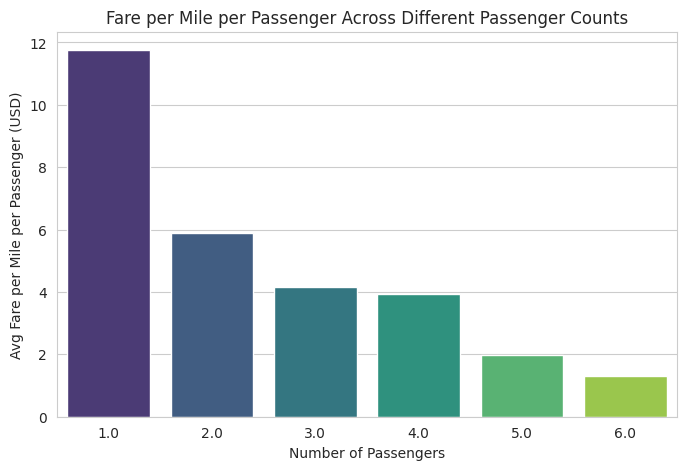

In [408]:
#Visualising the data for the fare per mile per passenger for different passenger counts
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_analysis, x="passenger_count", y="mean", palette="viridis")

plt.xlabel("Number of Passengers")
plt.ylabel("Avg Fare per Mile per Passenger (USD)")
plt.title("Fare per Mile per Passenger Across Different Passenger Counts")
plt.show()

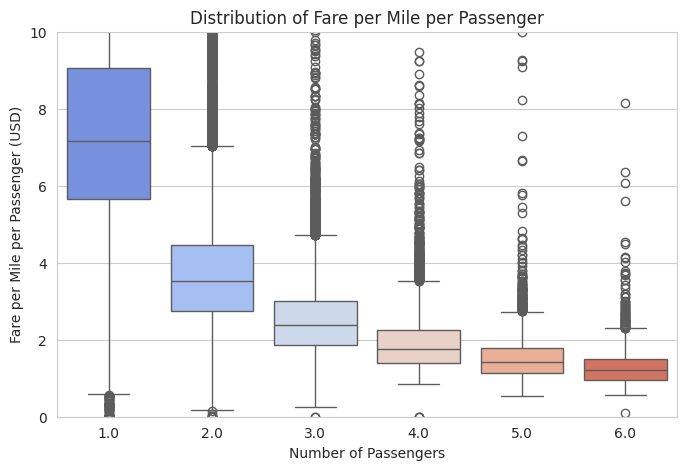

In [409]:
#Visualising data distribution of fare per mile per passenger
plt.figure(figsize=(8, 5))
sns.boxplot(data=valid_trips, x="passenger_count", y="fare_per_mile_per_passenger", palette="coolwarm")

plt.xlabel("Number of Passengers")
plt.ylabel("Fare per Mile per Passenger (USD)")
plt.title("Distribution of Fare per Mile per Passenger")
plt.ylim(0, 10)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [410]:
# Compare the average fare per mile for different days and for different times of the day
# Remove trips with zero distance
valid_trips = trip_df[trip_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by day of the week
fare_by_day = valid_trips.groupby("pickup_day_name")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Group by pickup hour
fare_by_hour = valid_trips.groupby("pickup_hour")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Display results
print(fare_by_day)
print(fare_by_hour)

  pickup_day_name       mean    median         std
0          Friday  10.738629  7.226891  100.941202
1          Monday  10.294384  6.944444  101.719980
2        Saturday  10.310161  7.049180  102.857128
3          Sunday  13.816378  6.478261  205.443752
4        Thursday  10.774062  7.428571  103.464077
5         Tuesday  15.438081  7.352941  997.406395
6       Wednesday  11.285470  7.430556  119.195695
    pickup_hour       mean    median          std
0             0   9.960147  6.000000   121.312500
1             1  11.742240  5.931373   144.999569
2             2  10.684646  5.860927   137.498450
3             3   9.454826  5.673759    79.866869
4             4   7.049075  5.140562    28.539382
5             5  18.148613  5.159094   222.652662
6             6   9.216498  5.699301    73.996882
7             7   9.573463  6.535948   100.754517
8             8   9.690854  7.212333    97.284493
9             9  11.103823  7.452830   114.936912
10           10  25.734748  7.500000  1753

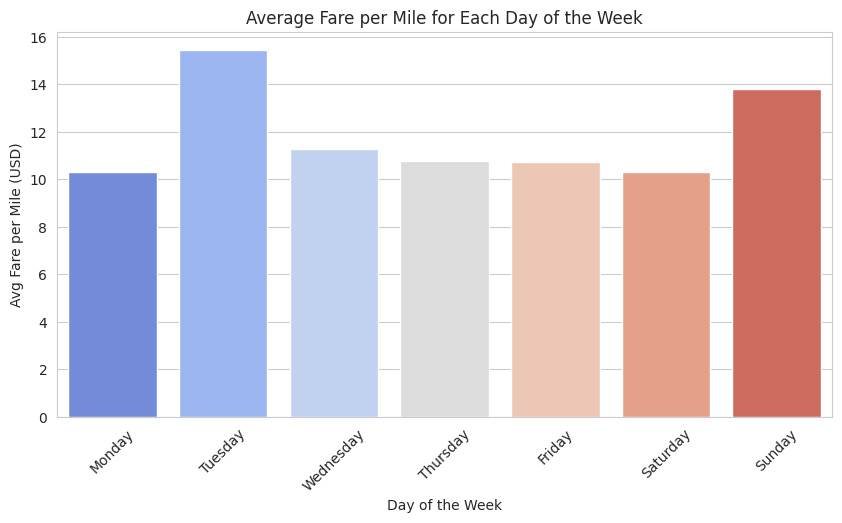

In [411]:
#Average Fare Per Mile for Each Day
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x="pickup_day_name", y="mean", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")

plt.xlabel("Day of the Week")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Each Day of the Week")
plt.xticks(rotation=45)
plt.show()

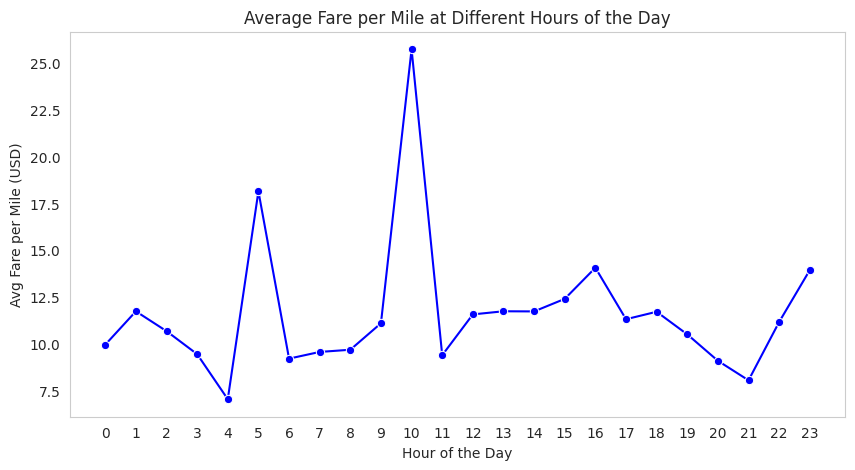

In [412]:
#Fare Per Mile Across Different Hours of the day
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_hour, x="pickup_hour", y="mean", marker="o", color="blue")

plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile at Different Hours of the Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [413]:
# Compare fare per mile for different vendors
# Remove trips with zero distance
valid_trips = trip_df[trip_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID
fare_by_vendor = valid_trips.groupby("VendorID")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Display results
print(fare_by_vendor)


   VendorID       mean    median         std
0         1  10.851252  7.153846  740.686797
1         2  12.106634  7.117904  141.377067
2         6   5.433861  4.539528    2.993626


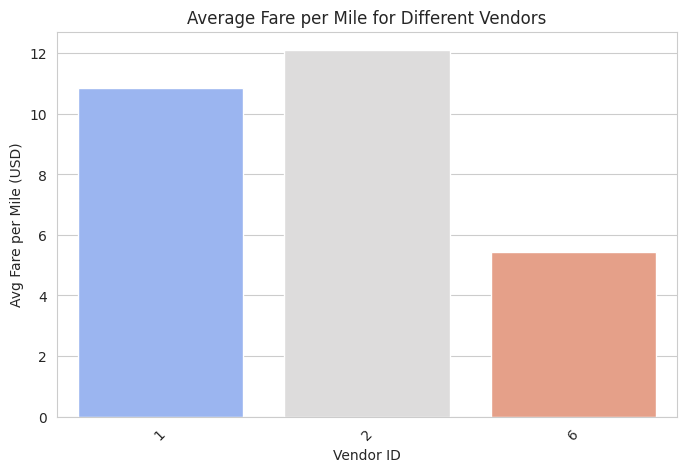

In [414]:
#Average Fare Per Mile For Each Vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x="VendorID", y="mean", palette="coolwarm")

plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Different Vendors")
plt.xticks(rotation=45)
plt.show()

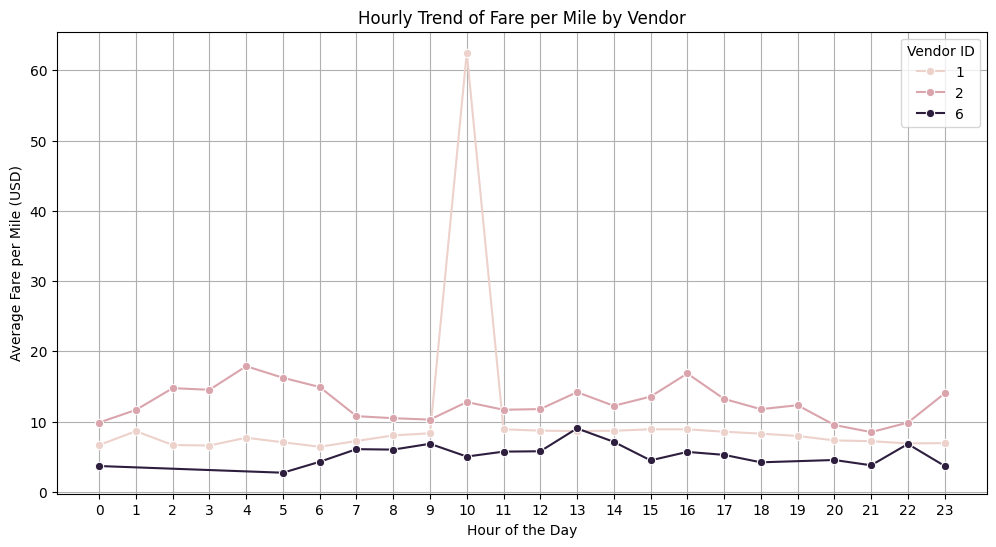

In [88]:
#Analyse the data to understand the Hourly Trend of Fare Per Mile by Vendor
import seaborn as sns
import matplotlib.pyplot as plt

# Remove trips with zero distance
valid_trips = trip_df[trip_df["trip_distance"] > 0].copy()

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID and pickup hour
fare_by_hour_vendor = valid_trips.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_by_hour_vendor, x="pickup_hour", y="fare_per_mile", hue="VendorID", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Hourly Trend of Fare per Mile by Vendor")
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


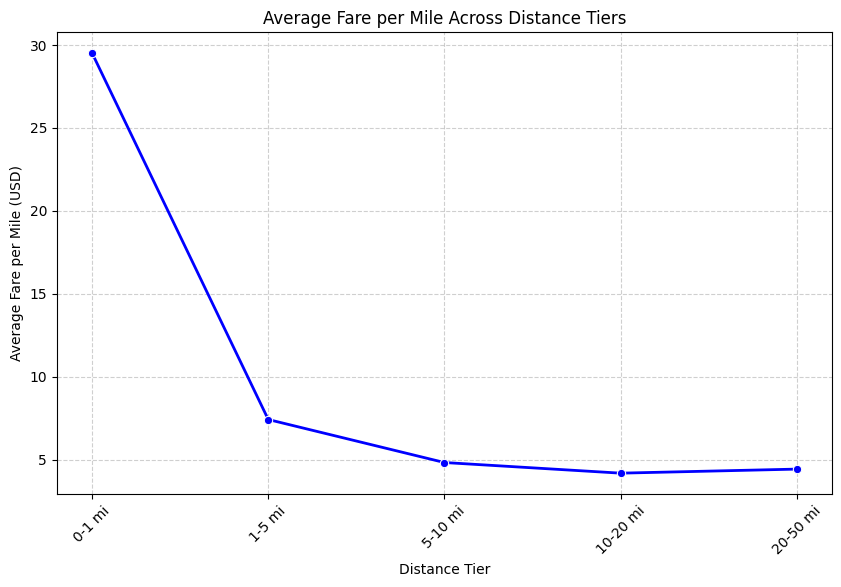

In [93]:
#Average Fare per mile across distance tires
# Defining distance tiers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure valid trip data
trip_df = trip_df[trip_df["trip_distance"] > 0]  # Remove zero-distance trips
trip_df["fare_per_mile"] = trip_df["fare_amount"] / trip_df["trip_distance"]

# Define distance tiers
bins = [0, 1, 5, 10, 20, 50, 100]
labels = ["0-1 mi", "1-5 mi", "5-10 mi", "10-20 mi", "20-50 mi", "50+ mi"]
trip_df["distance_tier"] = pd.cut(trip_df["trip_distance"], bins=bins, labels=labels, ordered=True)

# Aggregate data: average fare per mile per tier
tier_avg_fare = trip_df.groupby("distance_tier")["fare_per_mile"].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=tier_avg_fare, x="distance_tier", y="fare_per_mile", marker="o", linewidth=2, color="blue")

# Labels and title
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile Across Distance Tiers")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


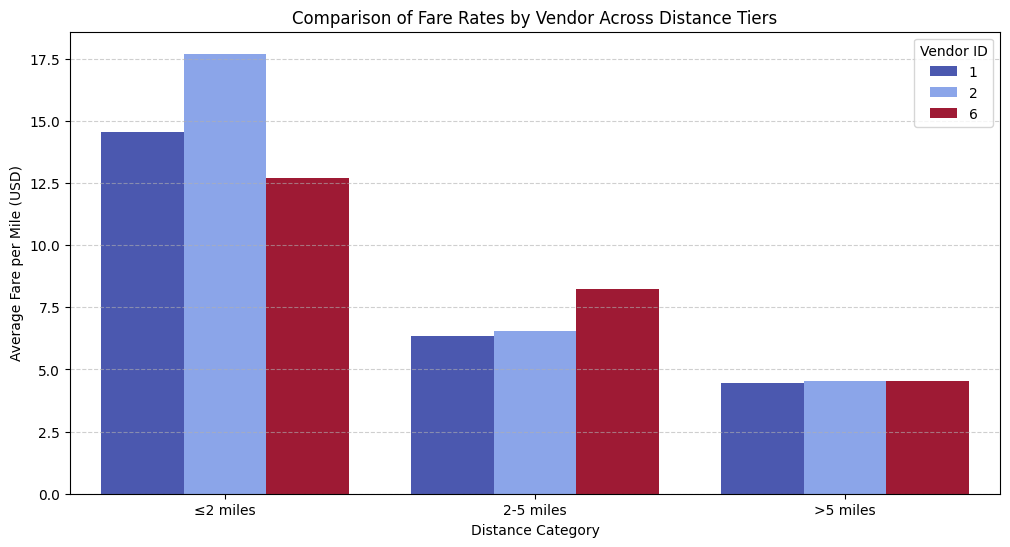

In [94]:
#Comparision of Fare rates by vendor across distance tires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure valid trip data
valid_trips = trip_df[trip_df["trip_distance"] > 0].copy()
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Define distance categories
conditions = [
    (valid_trips["trip_distance"] <= 2),
    (valid_trips["trip_distance"] > 2) & (valid_trips["trip_distance"] <= 5),
    (valid_trips["trip_distance"] > 5)
]
labels = ["≤2 miles", "2-5 miles", ">5 miles"]
valid_trips["distance_category"] = pd.cut(valid_trips["trip_distance"], bins=[0, 2, 5, float('inf')], labels=labels, ordered=True)

# Aggregate average fare per mile by vendor and distance category
fare_by_vendor = valid_trips.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_by_vendor, x="distance_category", y="fare_per_mile", hue="VendorID", palette="coolwarm")

# Labels and title
plt.xlabel("Distance Category")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Comparison of Fare Rates by Vendor Across Distance Tiers")
plt.legend(title="Vendor ID")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

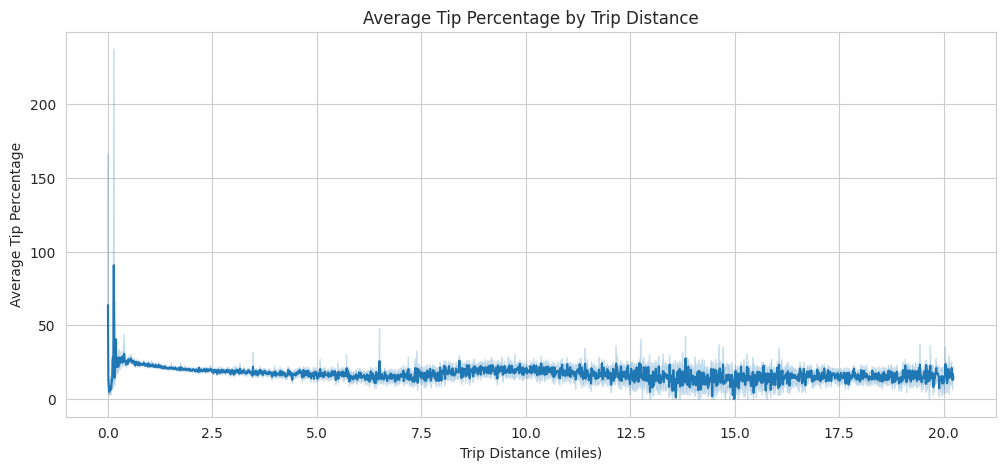

In [420]:
#  Analyze tip percentages based on distances

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no division by zero
trip_df["tip_percentage"] = (trip_df["tip_amount"] / trip_df["fare_amount"]) * 100
trip_df["tip_percentage"].fillna(0, inplace=True)

# Analyze Tip Percentage vs. Trip Distance
plt.figure(figsize=(12, 5))
sns.lineplot(data=trip_df, x="trip_distance", y="tip_percentage", estimator="mean")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip Percentage by Trip Distance")
plt.show()

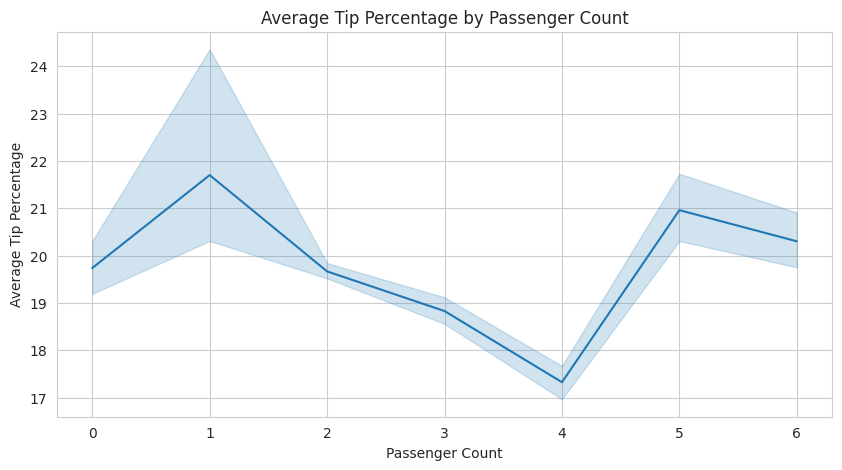

In [421]:
#  Analyze tip percentages based on Passenger Count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no division by zero
trip_df["tip_percentage"] = (trip_df["tip_amount"] / trip_df["fare_amount"]) * 100
trip_df["tip_percentage"].fillna(0, inplace=True)


plt.figure(figsize=(10, 5))
sns.lineplot(data=trip_df, x="passenger_count", y="tip_percentage", estimator="mean")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip Percentage by Passenger Count")
plt.show()

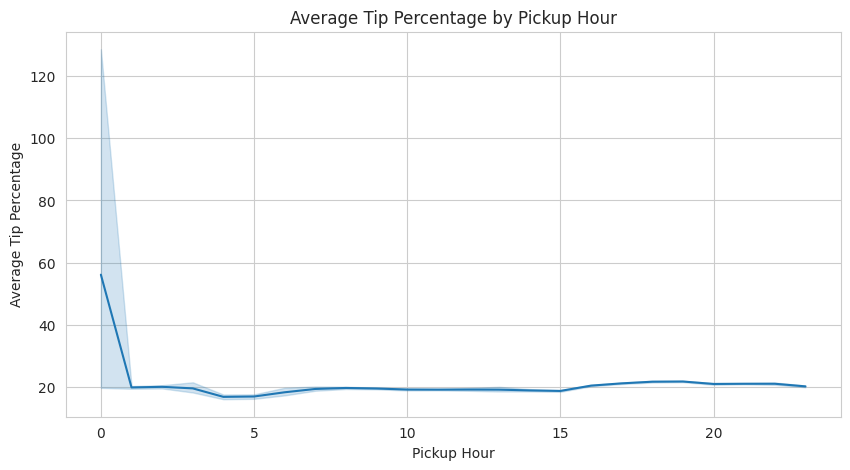

In [422]:
#  Analyze tip percentages based on Pickup Hour
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no division by zero
trip_df["tip_percentage"] = (trip_df["tip_amount"] / trip_df["fare_amount"]) * 100
trip_df["tip_percentage"].fillna(0, inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=trip_df, x="pickup_hour", y="tip_percentage", estimator="mean")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip Percentage by Pickup Hour")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [424]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
trip_df["tip_category"] = pd.cut(trip_df["tip_percentage"],
                                 bins=[-1, 10, 25, 100],
                                 labels=["Low (<10%)", "Medium (10-25%)", "High (>25%)"])

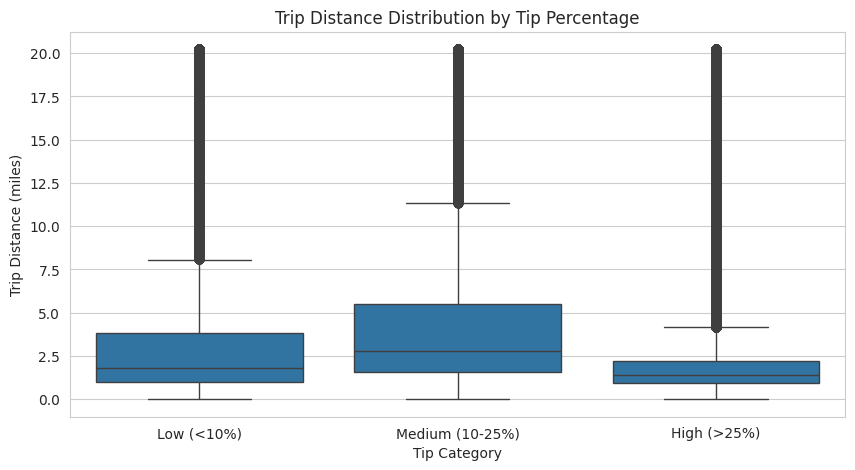

In [425]:
#Comparing trip Characteristics
plt.figure(figsize=(10, 5))
sns.boxplot(data=trip_df, x="tip_category", y="trip_distance")
plt.xlabel("Tip Category")
plt.ylabel("Trip Distance (miles)")
plt.title("Trip Distance Distribution by Tip Percentage")
plt.show()

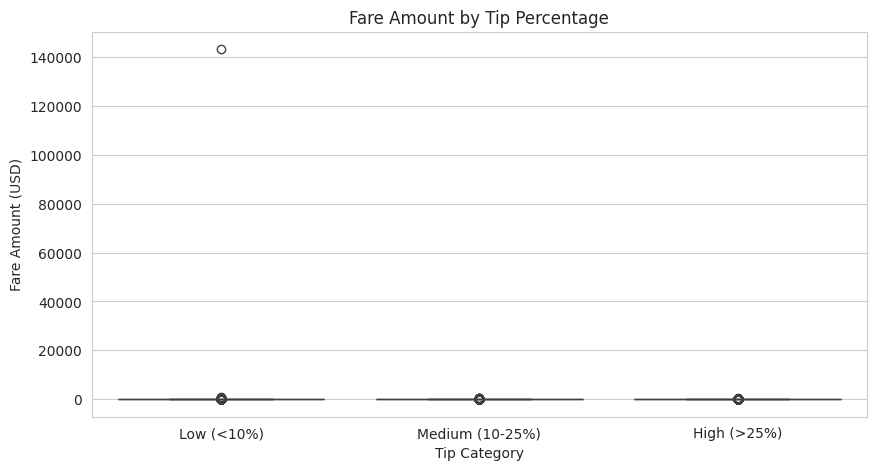

In [426]:
#Fare Amount Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=trip_df, x="tip_category", y="fare_amount")
plt.xlabel("Tip Category")
plt.ylabel("Fare Amount (USD)")
plt.title("Fare Amount by Tip Percentage")
plt.show()

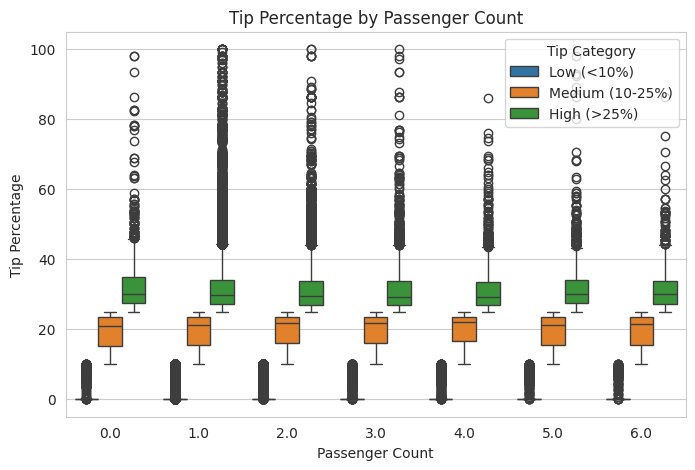

In [427]:
#Trip Percentage vs passenger count
plt.figure(figsize=(8, 5))
sns.boxplot(data=trip_df, x="passenger_count", y="tip_percentage", hue="tip_category")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage")
plt.title("Tip Percentage by Passenger Count")
plt.legend(title="Tip Category")
plt.show()

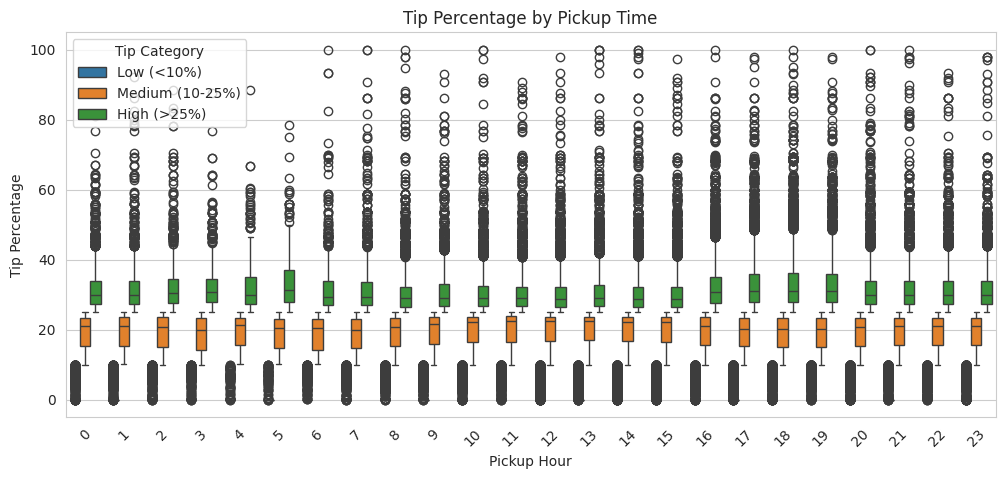

In [428]:
#Trip percentage by pickup hour
plt.figure(figsize=(12, 5))
sns.boxplot(data=trip_df, x="pickup_hour", y="tip_percentage", hue="tip_category")
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Percentage")
plt.title("Tip Percentage by Pickup Time")
plt.legend(title="Tip Category")
plt.xticks(rotation=45)
plt.show()

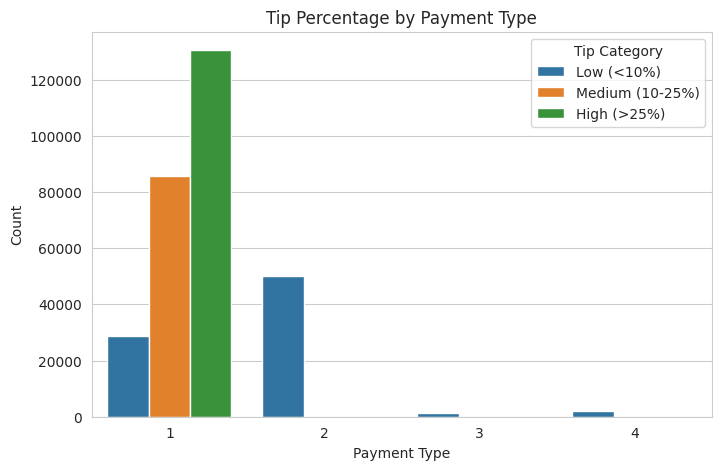

In [429]:
#Comparing payment Types
plt.figure(figsize=(8, 5))
sns.countplot(data=trip_df, x="payment_type", hue="tip_category")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Tip Percentage by Payment Type")
plt.legend(title="Tip Category")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

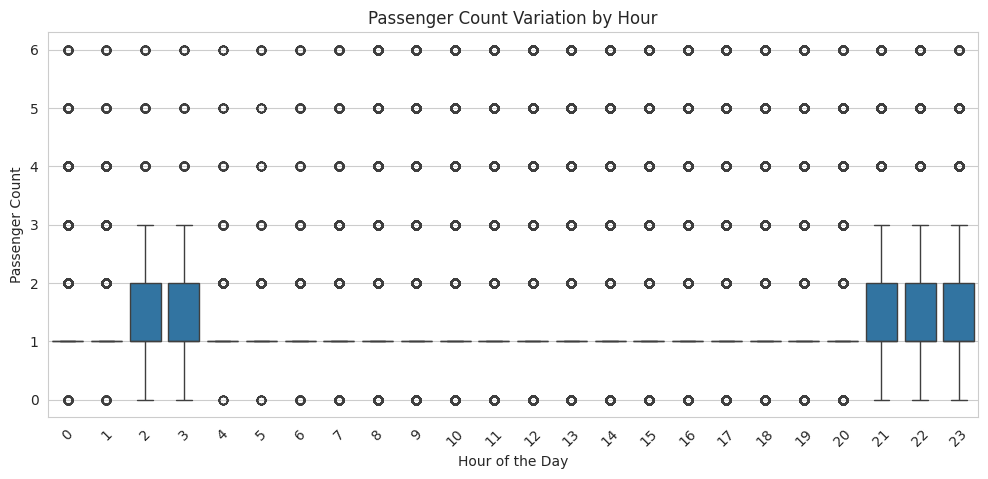

In [430]:
# See how passenger count varies across hours and days

#Passenger Count by Hour of the Day
plt.figure(figsize=(12, 5))
sns.boxplot(data=trip_df, x="pickup_hour", y="passenger_count")
plt.xlabel("Hour of the Day")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Variation by Hour")
plt.xticks(rotation=45)
plt.show()

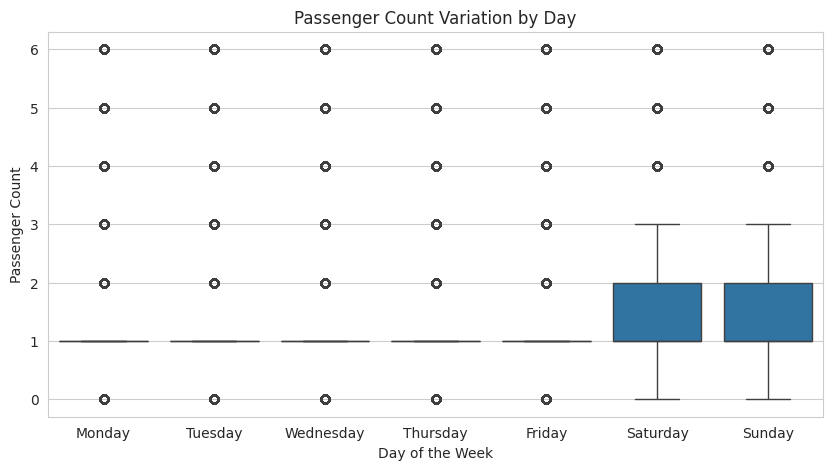

In [431]:
#Passenger Count by Day of the Week
plt.figure(figsize=(10, 5))
sns.boxplot(data=trip_df, x="pickup_day_name", y="passenger_count",
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Day of the Week")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Variation by Day")
plt.show()

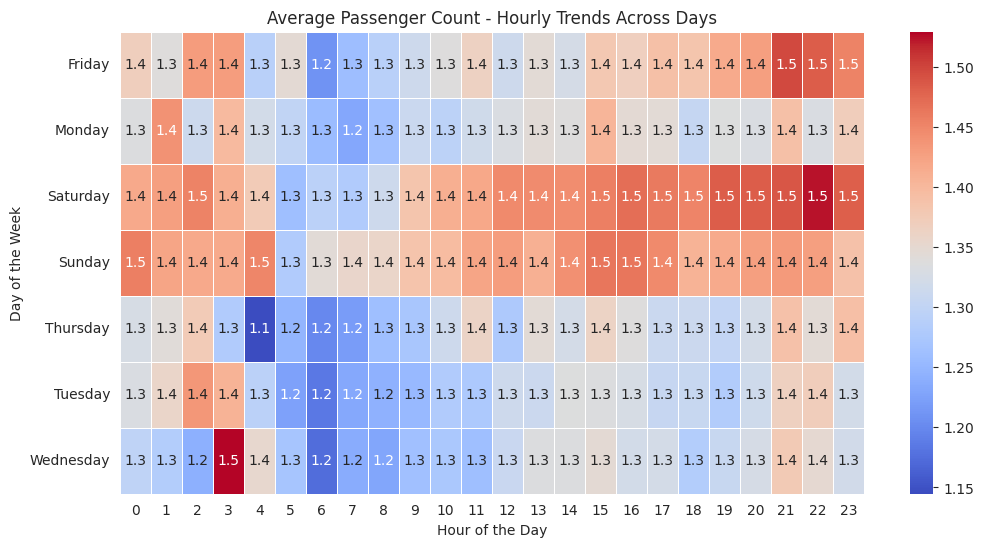

In [432]:
#Heatmap - Hourly Passenger Trends Across Days
hourly_passenger_trends = trip_df.groupby(["pickup_day_name", "pickup_hour"])["passenger_count"].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_passenger_trends, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Average Passenger Count - Hourly Trends Across Days")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

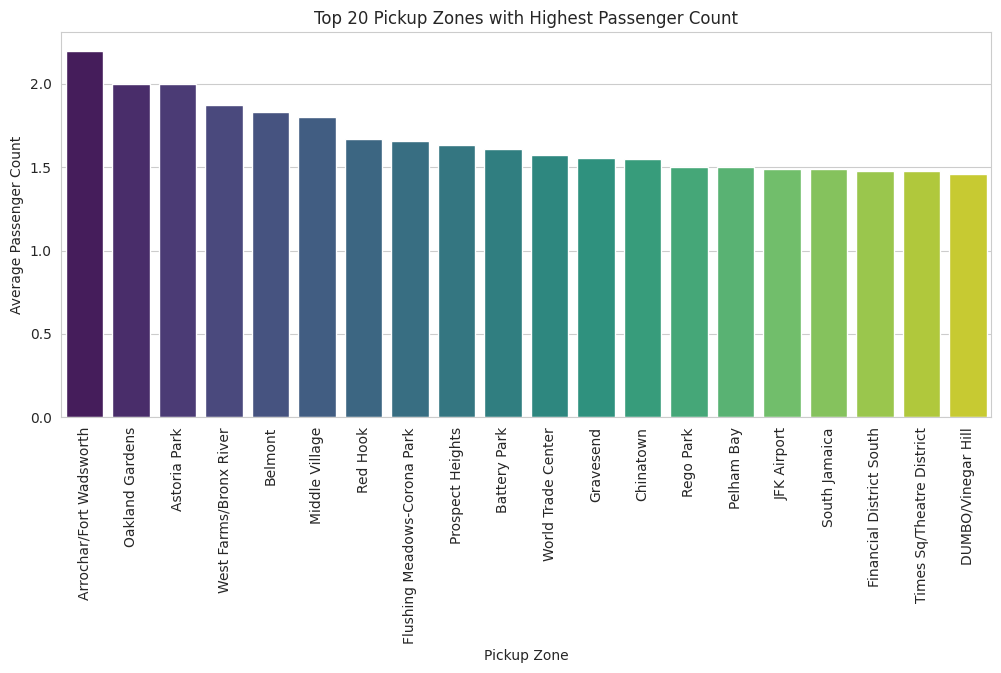

In [433]:
# How does passenger count vary across zones
#Average Passenger count by pickup zone
top_zones = trip_df.groupby("pickup_zone")["passenger_count"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_zones.index, y=top_zones.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Pickup Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Pickup Zones with Highest Passenger Count")
plt.show()

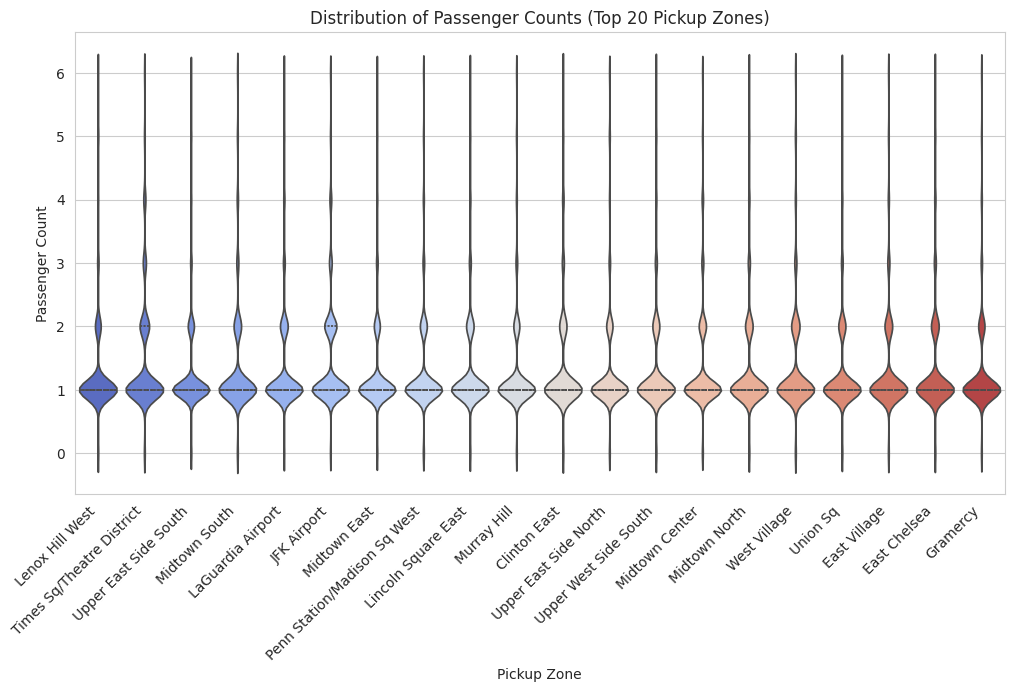

In [434]:
#Distribution of Passenger Count by Zone
# Find the top 20 zones with the highest number of pickups
top_zones = trip_df["pickup_zone"].value_counts().nlargest(20).index

# Filter the trip data to only include trips from the top zones
filtered_trips = trip_df[trip_df["pickup_zone"].isin(top_zones)]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_trips, x="pickup_zone", y="passenger_count", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Pickup Zone")
plt.ylabel("Passenger Count")
plt.title("Distribution of Passenger Counts (Top 20 Pickup Zones)")
plt.show()

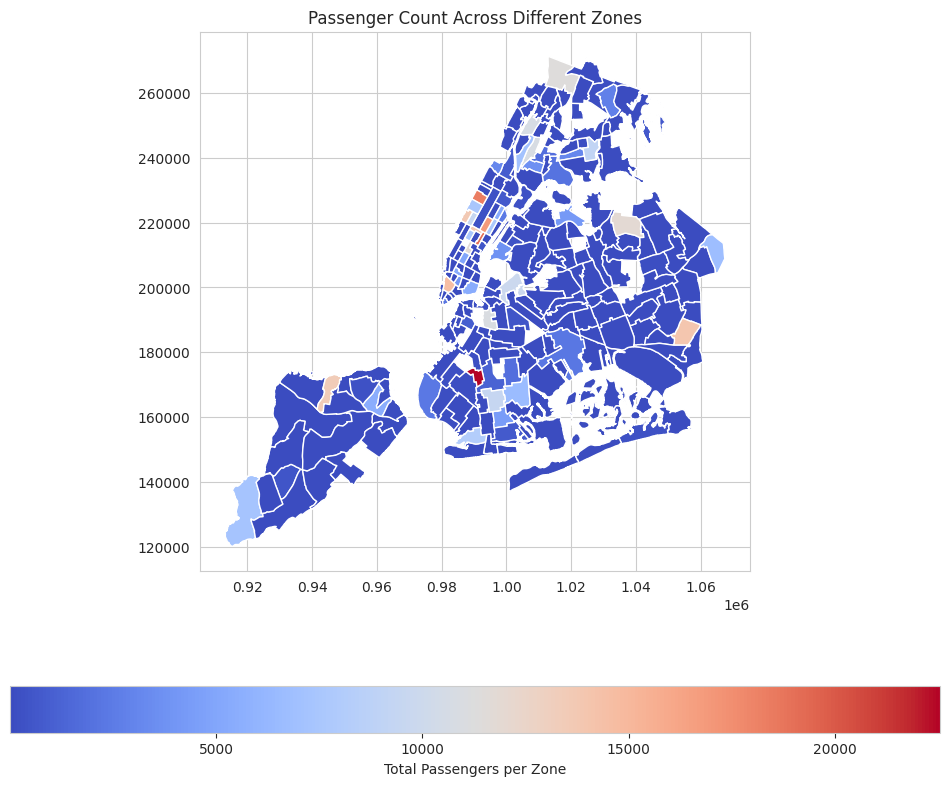

In [435]:
#Passenger Count Across Zones
# Aggregate total passengers per zone
taxi_zones["total_passengers"] = trip_df.groupby("PULocationID")["passenger_count"].sum()

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
taxi_zones.plot(column="total_passengers", ax=ax, cmap="coolwarm", legend=True,
           legend_kwds={'label': "Total Passengers per Zone", 'orientation': "horizontal"})
plt.title("Passenger Count Across Different Zones")
plt.show()

In [436]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Group by pickup zone (PULocationID) and calculate the average passenger count
avg_passenger_per_zone = trip_df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Rename the columns for clarity
avg_passenger_per_zone.rename(columns={"PULocationID": "LocationID", "passenger_count": "avg_passenger_count"}, inplace=True)

# Merge with taxi_zones GeoDataFrame
taxi_zones = taxi_zones.merge(avg_passenger_per_zone, on="LocationID", how="left")

# Fill NaN values with 0 (for zones with no trips)
taxi_zones["avg_passenger_count"].fillna(0, inplace=True)

# Display first few rows
taxi_zones[["LocationID", "zone", "avg_passenger_count"]].head()

LocationID                     zone  avg_passenger_count
0           1           Newark Airport             1.142857
1           2              Jamaica Bay             0.000000
2           3  Allerton/Pelham Gardens             1.000000
3           4            Alphabet City             1.283117
4           5            Arden Heights             1.000000

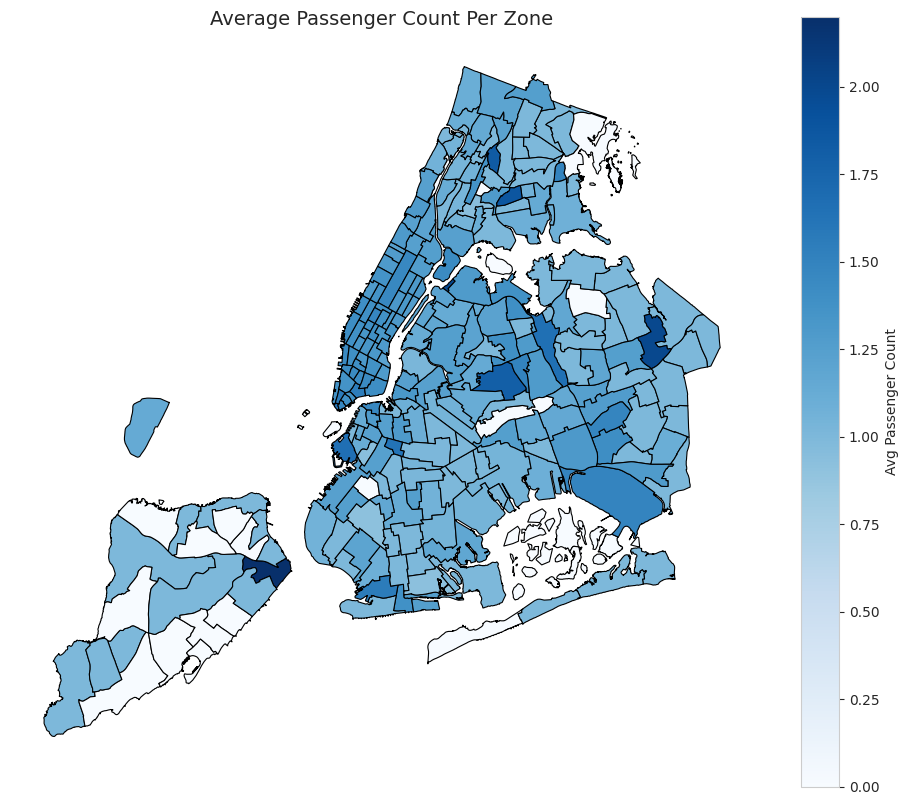

In [437]:
# Define figure size
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map with average passenger count
taxi_zones.plot(column="avg_passenger_count",
                cmap="Blues",  # Color gradient
                linewidth=0.8,
                edgecolor="k",
                legend=True,
                legend_kwds={"label": "Avg Passenger Count", "orientation": "vertical"},
                ax=ax)

# Add title
ax.set_title("Average Passenger Count Per Zone", fontsize=14)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show plot
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

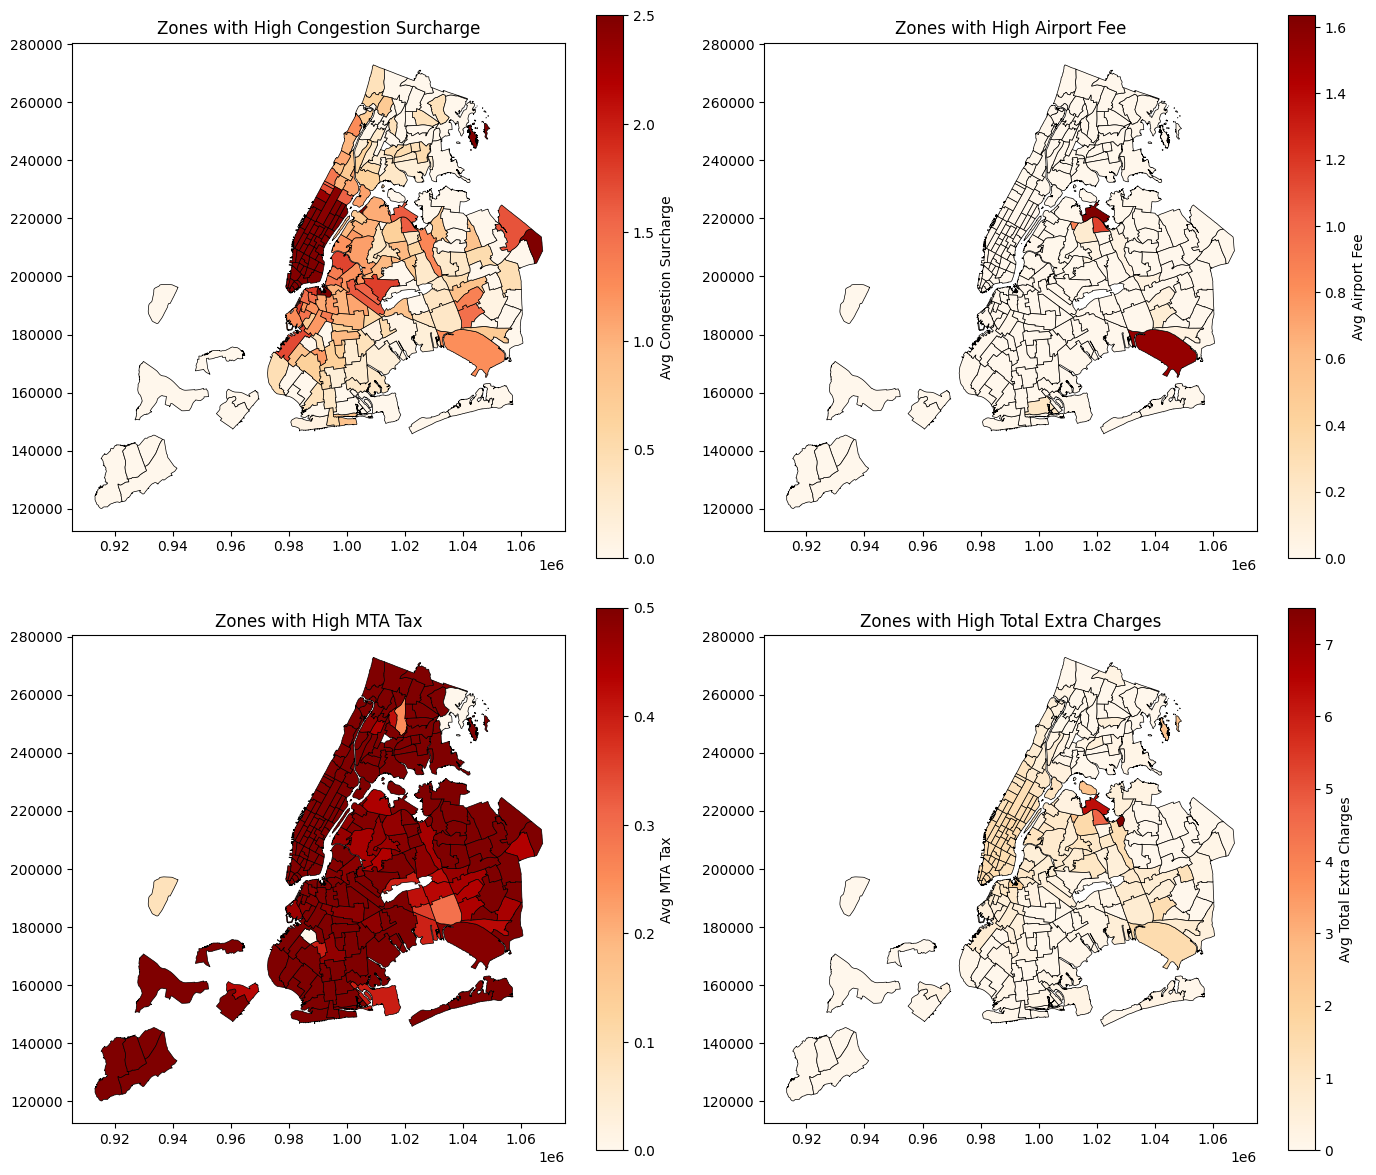

In [95]:
#Extra Charge based on Zones
# Group by pickup zone and calculate average of each extra charge type
zone_extra_charges = trip_df.groupby("PULocationID")[["congestion_surcharge", "Airport_fee", "mta_tax", "extra"]].mean().reset_index()

# Merge with taxi_zones GeoDataFrame
taxi_zones_extra = taxi_zones.merge(zone_extra_charges, left_on="LocationID", right_on="PULocationID")

# Define extra charge types
charge_types = ["congestion_surcharge", "Airport_fee", "mta_tax", "extra"]
titles = ["Congestion Surcharge", "Airport Fee", "MTA Tax", "Total Extra Charges"]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, charge in enumerate(charge_types):
    ax = axes[i // 2, i % 2]
    taxi_zones_extra.plot(column=charge, cmap="OrRd", linewidth=0.5, edgecolor="k",
                          legend=True, legend_kwds={"label": f"Avg {titles[i]}", "orientation": "vertical"},
                          ax=ax)
    ax.set_title(f"Zones with High {titles[i]}", fontsize=12)

plt.tight_layout()
plt.show()

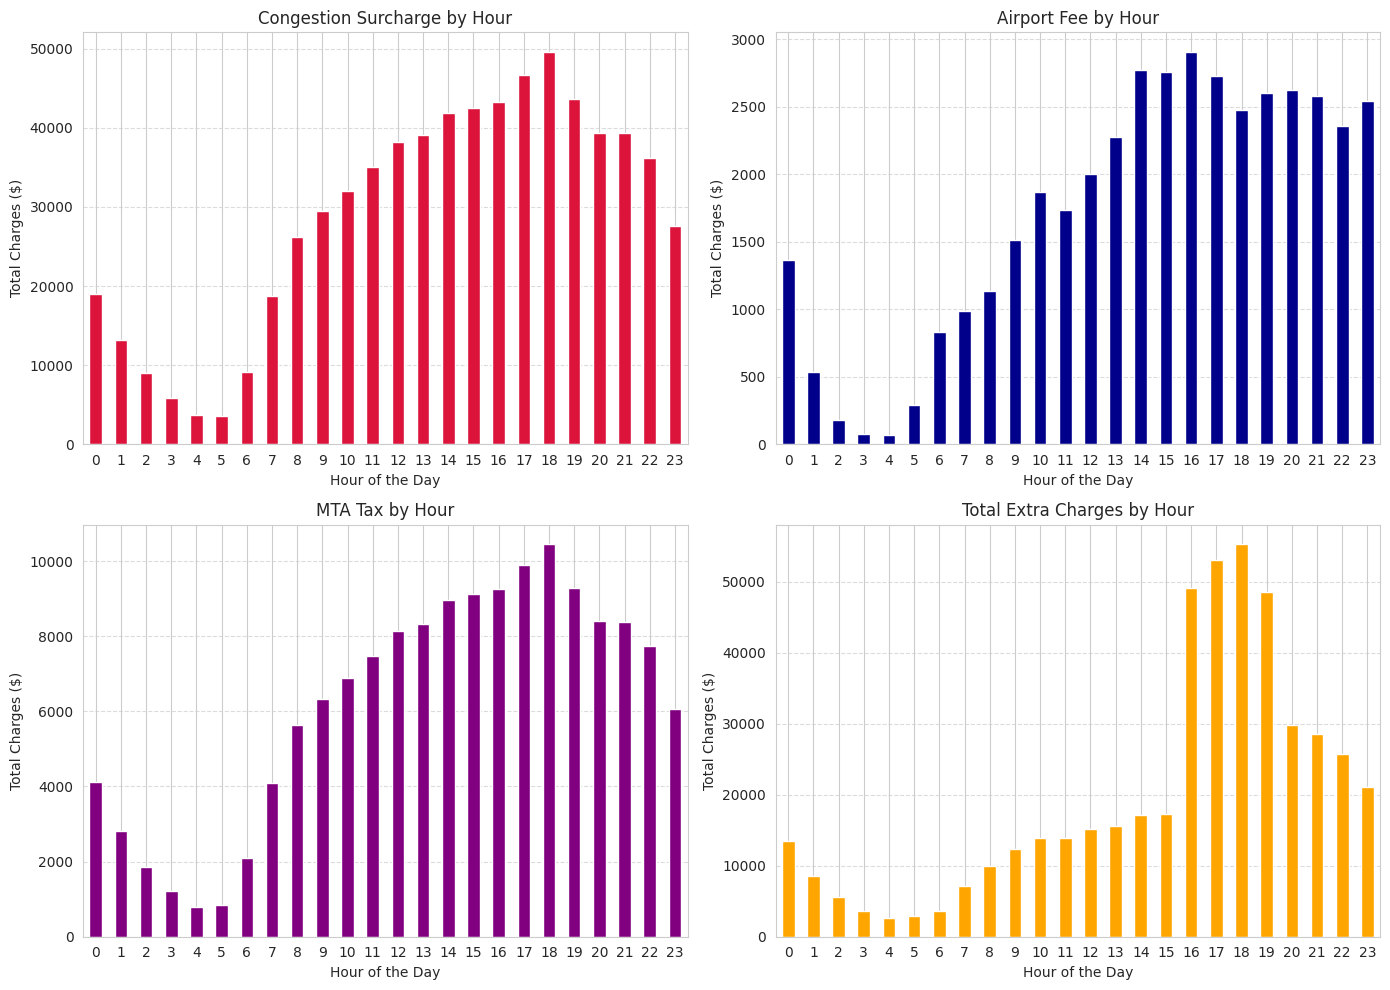

In [441]:
#Extra Charges on Hour Basis
# Group by pickup hour and calculate total sum of extra charges
hourly_extra_charges = trip_df.groupby("pickup_hour")[["congestion_surcharge", "Airport_fee", "mta_tax", "extra"]].sum()

# Plot each charge type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ["crimson", "darkblue", "purple", "orange"]
titles = ["Congestion Surcharge", "Airport Fee", "MTA Tax", "Total Extra Charges"]

for i, charge in enumerate(charge_types):
    ax = axes[i // 2, i % 2]
    hourly_extra_charges[charge].plot(kind="bar", color=colors[i], ax=ax)
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Total Charges ($)")
    ax.set_title(f"{titles[i]} by Hour")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticks(range(0, 24))
    ax.set_xticklabels(range(0, 24), rotation=0)

plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#A set of recommendations exists to boost routing and dispatching procedures

# 1. Time-Based Optimization:
# - The implementation of dynamic price strategies for peak hours will attract drivers and potentially stabilize supply and demand levels.
# - Strategic placement of drivers should occur in the highest demand zones determined through analysis of the "Top 20 Pickup Zones with Highest Passenger Count".
# - During off-peak periods we should direct our drivers to zones where passenger numbers are low but they may need to cover extended distances at enhanced rates per mile (analyze fare_by_day).

# 2. Location-Based Optimization:
# - The analytics tool "Passenger Count Across Zones" combined with "Zones with High Extra Charges" provides data about regions with ongoing high demand which allows drivers to be distributed effectively. The operation should focus on the zones with highest demand especially in peak periods.
# - The deployment of drivers in areas with high driver fees from airports should be considered if demand expectations are high.
# - An evaluation of how passenger numbers shift between various zones will enable the optimization of service delivery.
# - The deployment of routes should include high extra charge areas to boost revenue output.

# 3. Day-of-the-Week Optimization:
# - The organization should adjust driver staffing based on what day it is.  Total driver operations will increase on weekdays especially during peak traffic hours based on passenger volumes from analysis.
# - The company should give drivers compensation to operate on days and times when traffic is lower in order to boost service availability.

# 4. Passenger Count Optimization:
# - The analysis should study daily and hourly passenger numbers within specific zones for surge hour prediction.
# - The implementation of a passenger prediction mechanism should exist to forecast route zone passenger volumes for each time segment during the day. The forecasted data should be used to control vehicle deployment.
# - The system will determine vehicle choices through machine automation according to passenger number distribution by matching smaller rides with one person while sending extended vehicles to multiple riders.

# 5. Fare Optimization and Surge Pricing:
# - The system applies surge pricing algorithms which perform automatic fare modifications based on current demand levels and position along with extra costs and congestion surcharges and time and location specifics.
# - A distance-based tiered fare system should be implemented as a revenue strategy which protects customer satisfaction levels.

# 6.  Customer Experience:
# - The service quality at tip-based locations may be improved through understanding passenger preferences together with tip percentage rules.
# - Using the relationship between mileage length together with fare amount and gratuity payments will enable improvements in customer service quality and user experience.

# 7.  Operational Efficiency:
# - Minimize inefficiencies through the analysis of wait time and trip time and route optimization accordingly.
# - The evaluation and adaptation of emerging patterns regarding demand behavior plus traffic conditions and weather situations supports optimal deployment of drivers.

# 8. Data-Driven Insights:
# - Sophisticated analytics tools including machine learning and similar approaches should be utilized to predict customer demand patterns which enables better execution of real-time dispatch operations.
# - The organization should conduct routine demand evaluations which drive adaptations to their current tactics.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#A set of recommendations exists to boost routing and dispatching procedures

# 1. Time-Based Optimization:
# - The implementation of dynamic price strategies for peak hours will attract drivers and potentially stabilize supply and demand levels.
# - Strategic placement of drivers should occur in the highest demand zones determined through analysis of the "Top 20 Pickup Zones with Highest Passenger Count".
# - During off-peak periods we should direct our drivers to zones where passenger numbers are low but they may need to cover extended distances at enhanced rates per mile (analyze fare_by_day).

# 2. Location-Based Optimization:
# - The analytics tool "Passenger Count Across Zones" combined with "Zones with High Extra Charges" provides data about regions with ongoing high demand which allows drivers to be distributed effectively. The operation should focus on the zones with highest demand especially in peak periods.
# - The deployment of drivers in areas with high driver fees from airports should be considered if demand expectations are high.
# - An evaluation of how passenger numbers shift between various zones will enable the optimization of service delivery.
# - The deployment of routes should include high extra charge areas to boost revenue output.

# 3. Day-of-the-Week Optimization:
# - The organization should adjust driver staffing based on what day it is.  Total driver operations will increase on weekdays especially during peak traffic hours based on passenger volumes from analysis.
# - The company should give drivers compensation to operate on days and times when traffic is lower in order to boost service availability.

# 4. Passenger Count Optimization:
# - The analysis should study daily and hourly passenger numbers within specific zones for surge hour prediction.
# - The implementation of a passenger prediction mechanism should exist to forecast route zone passenger volumes for each time segment during the day. The forecasted data should be used to control vehicle deployment.
# - The system will determine vehicle choices through machine automation according to passenger number distribution by matching smaller rides with one person while sending extended vehicles to multiple riders.

# 5. Fare Optimization and Surge Pricing:
# - The system applies surge pricing algorithms which perform automatic fare modifications based on current demand levels and position along with extra costs and congestion surcharges and time and location specifics.
# - A distance-based tiered fare system should be implemented as a revenue strategy which protects customer satisfaction levels.

# 6.  Customer Experience:
# - The service quality at tip-based locations may be improved through understanding passenger preferences together with tip percentage rules.
# - Using the relationship between mileage length together with fare amount and gratuity payments will enable improvements in customer service quality and user experience.

# 7.  Operational Efficiency:
# - Minimize inefficiencies through the analysis of wait time and trip time and route optimization accordingly.
# - The evaluation and adaptation of emerging patterns regarding demand behavior plus traffic conditions and weather situations supports optimal deployment of drivers.

# 8. Data-Driven Insights:
# - Sophisticated analytics methods that include machine learning and other techniques will be deployed to predict demand patterns and deliver maximum dispatch capabilities in real-time.
# - The organization should conduct routine demand evaluations which drive adaptations to their current tactics.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Pricing Strategy Adjustments

# 1. Dynamic Pricing Based on Demand:
# - Prices need to use dynamic pricing methods which automatically modify fares according to present-day demand together with location and time factors.
# - The system incorporates historical and real-time data regarding number of available cabs and passenger requests to establish surge multiplier rates.
# - Surge multipliers must remain competitive against other vendors to stop customers from using them.

# 2. Time-Based Pricing:
# - The pricing strategy needs base fare sections that change according to weekday and hour of day as well as peak and off-peak schedules.
# - Customers should find discounts during sedate periods to both improve cab utilization rates while encouraging more rides during these times of low demand.
# For instance:
# - The fares during weekday rush hours (morning and evening) should be set at 10-20% above standard rates.
# - Weekends and late nights: modest discounts.

# 3. Distance-Based Tiered Pricing:
# - The system should use different price levels which depend on trip duration.
# - The fare for short distances below 2 miles will get adjusted slightly higher because it helps diminish operational expenses.
# - Expenditures per mile will reduce for riders making journeys between 2-5 miles.
# - The price for distances surpassing 5 miles should remain uniform either per mile or apply a discounted feature to remain competitive.

# 4. Location-Based Adjustments:
# Increase base fares on the basis of pickup and dropoff locations.
# - Peak-demand locations such as airports together with event hub zones should see a competitive price addition.
# - The strategy should provide minimal price reductions to attract additional demands in regions showing minimal activity.

# 5. Payment Method Surcharges:
# - The company should reevaluate their pricing structure according to how customers pay either with cash or cards.
# - Higher fee payment methods should bear a small additional charge which customers must see during checkout.
# - You should implement this special charge only if it remains comparable to pricing from competitors.

# 6. Factor Extra Charges in Pricing:
# - When determining trip prices for customers ensure that airport surcharges and congestion fee impacts result in an accurate fare computation.
# - The additional costs will not catch users by surprise because they are included before the transaction.

# 7. Competitive Analysis:
# - The company needs to check competitor prices systematically and change its approach based on observations.
# - Web scraping technology alongside APIs should be used to acquire competitor price data instantly to stay competitive in the market.

# 8. A/B Testing:
# - The company should conduct A/B tests involving different pricing methods to learn which tactics produce greatest revenue and reduce customer departure.
# Monitor revenue, number of trips, customer satisfaction, and driver earnings key metrics.

# 9. Transparency and Communication
# - The company should deliver direct price alerts to customers that include the explanation behind price variations (such as demand highs or special holidays).

# Implementation Notes:
# - The exact price modifications require precise calculations which use past data and present time demand patterns.
# - Ongoing monitoring combined with periodic revisions becomes essential for adjusting price strategies regarding changing market conditions.
# - The effectiveness of new pricing plans depends on A/B testing as this process ensures the plans both work well for customers and drivers without damaging their satisfaction.